# read TCGA_COAD data

In [27]:
#### read TCGA_COAD data ####
COAD_UCSC_Toil_tpm_dataset <- readRDS("/data8t_4/JH/MyJobs/Read_dataset/UCSC_Toil/COAD_UCSC_Toil_tpm_dataset_merge.syn2623706.rds")
COAD_RSEM_gene_tpm <- COAD_UCSC_Toil_tpm_dataset$COAD.RSEM.gene.tpm
gencode.v23.annotation <- COAD_UCSC_Toil_tpm_dataset$gencode.v23.annotation
COAD.pheno <- COAD_UCSC_Toil_tpm_dataset$COAD.pheno.merge.syn2623706
#head(gencode.v23.annotation)
## convert ensembleID to symbol 
geneMatch <- match(rownames(COAD_RSEM_gene_tpm),gencode.v23.annotation$V1)
geneSymbol <- as.character(gencode.v23.annotation[geneMatch,]$V2)
COAD_tpm_symbol <- COAD_RSEM_gene_tpm
rownames(COAD_tpm_symbol) <- geneSymbol
#head(COAD_tpm_symbol)

### Phenotype Update
### Seperate the Normal and Tumor samples
sampleID<- as.character(COAD.pheno$sample.x)
table(unlist(lapply(strsplit(sampleID,"-"), '[[', 4)))
sampleTypes <- unlist(lapply(strsplit(sampleID,"-"), '[[', 4))
sampleTypes[sampleTypes=="01"]<- "Tumor"
sampleTypes[sampleTypes=="11"]<- "Nomal"
COAD.pheno <- cbind(COAD.pheno , sampleTypes)


 01  02  06  11 
286   1   1  41 

In [6]:
## Read log10(x+1) transformed scReference 

scReference.log10.CV <- readRDS("/data8t_4/JH/MyJobs/Normal_cell_reference/Step2_Merge_and_Filter_the_scReference/scRef.merge.V6.1.log10.CV.rds")
#scReference.list.log10 <- scReference.log10.CV$
scReference.list.log10.CV8000 <- scReference.log10.CV$scRef.merge.V6.1.CV8000.log10
scReference.list.log10.CV4000 <- scReference.log10.CV$scRef.merge.V6.1.CV4000.log10
scReference.list.log10.CV3000 <- scReference.log10.CV$scRef.merge.V6.1.CV3000.log10
scReference.list.log10.CV2500 <- scReference.log10.CV$scRef.merge.V6.1.CV2500.log10
scReference.list.log10.CV2000 <- scReference.log10.CV$scRef.merge.V6.1.CV2000.log10
scReference.list.log10.CV1500 <- scReference.log10.CV$scRef.merge.V6.1.CV1500.log10

In [9]:
### Distance calculation
##### Distance calculation 
source("/data8t_4/JH/MyJobs/1_R_script/NormalCancer/refCorMerge.R")
### 
##### Transform COAD data
summary(colSums(COAD_tpm_symbol)) ### So its not log2 transformed
###### I had to add list to each reference table
# Expression data transformation Log(x+1)
Log10.expList <- list(COAD_tpm_symbol = log10(COAD_tpm_symbol+1))
Cor.Res.CV8000 <- refCorMerge(Log10.expList, list(scReference.list.log10.CV8000))
Cor.Res.CV4000 <- refCorMerge(Log10.expList, list(scReference.list.log10.CV4000))
Cor.Res.CV3000 <- refCorMerge(Log10.expList, list(scReference.list.log10.CV3000))
Cor.Res.CV2500 <- refCorMerge(Log10.expList, list(scReference.list.log10.CV2500))
Cor.Res.CV2000 <- refCorMerge(Log10.expList, list(scReference.list.log10.CV2000))
Cor.Res.CV1500 <- refCorMerge(Log10.expList, list(scReference.list.log10.CV1500))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1e+06   1e+06   1e+06   1e+06   1e+06   1e+06 

[1] "Using 10 parallel cores"
[1] "Using 10 parallel cores"
[1] "Using 10 parallel cores"
[1] "Using 10 parallel cores"
[1] "Using 10 parallel cores"
[1] "Using 10 parallel cores"


In [13]:
head(COAD.pheno)

sample.x        X_PATIENT    cancer.type.abbreviation
1 TCGA-F4-6854-01 TCGA-F4-6854 COAD                    
2 TCGA-D5-5538-01 TCGA-D5-5538 COAD                    
3 TCGA-AA-3511-01 TCGA-AA-3511 COAD                    
4 TCGA-QG-A5YX-01 TCGA-QG-A5YX COAD                    
5 TCGA-G4-6320-01 TCGA-G4-6320 COAD                    
6 TCGA-CM-6164-01 TCGA-CM-6164 COAD                    
  age_at_initial_pathologic_diagnosis gender.x race                     
1 77                                  FEMALE   WHITE                    
2 60                                  FEMALE   WHITE                    
3 64                                  MALE                              
4 61                                  FEMALE   BLACK OR AFRICAN AMERICAN
5 73                                  MALE     WHITE                    
6 46                                  FEMALE   WHITE                    
  ajcc_pathologic_tumor_stage clinical_stage histological_type   
1 Stage IIA                                  Colon Adenocarcinoma
2 Stage IIIB                                 Colon Adenocarcinoma
3 Stage II                                   Colon Adenocarcinoma
4 Stage IIA                                  Colon Adenocarcinoma
5 Stage III                                  Colon Adenocarcinoma
6 Stage IIA                                  Colon Adenocarcinoma
  histological_grade ⋯ grade msi cimp      kras_mut braf_mut cms_label
1                    ⋯ NA    mss CIMP.Neg   1        0       CMS2     
2                    ⋯ NA    mss CIMP.Neg   1        0       CMS4     
3                    ⋯ NA    mss CIMP.Neg   1        0       NOLBL    
4                    ⋯ NA    NA  CIMP.Neg  NA       NA       CMS3     
5                    ⋯ NA    msi CIMP.High  1        0       CMS3     
6                    ⋯ NA    mss CIMP.Neg   1        0       CMS2     
  osMo       osStat rfsMo rfsStat
1  0.5260274 0      NA    NA     
2  6.7068493 0      NA    NA     
3  0.0000000 0      NA    NA     
4 17.2931507 0      NA    NA     
5 22.2904110 0      NA    NA     
6 16.0109589 0      NA    NA

Setting SC3 parameters...
Calculating distances between the cells...
Performing transformations and calculating eigenvectors...
Performing k-means clustering...


Calculating consensus matrix...


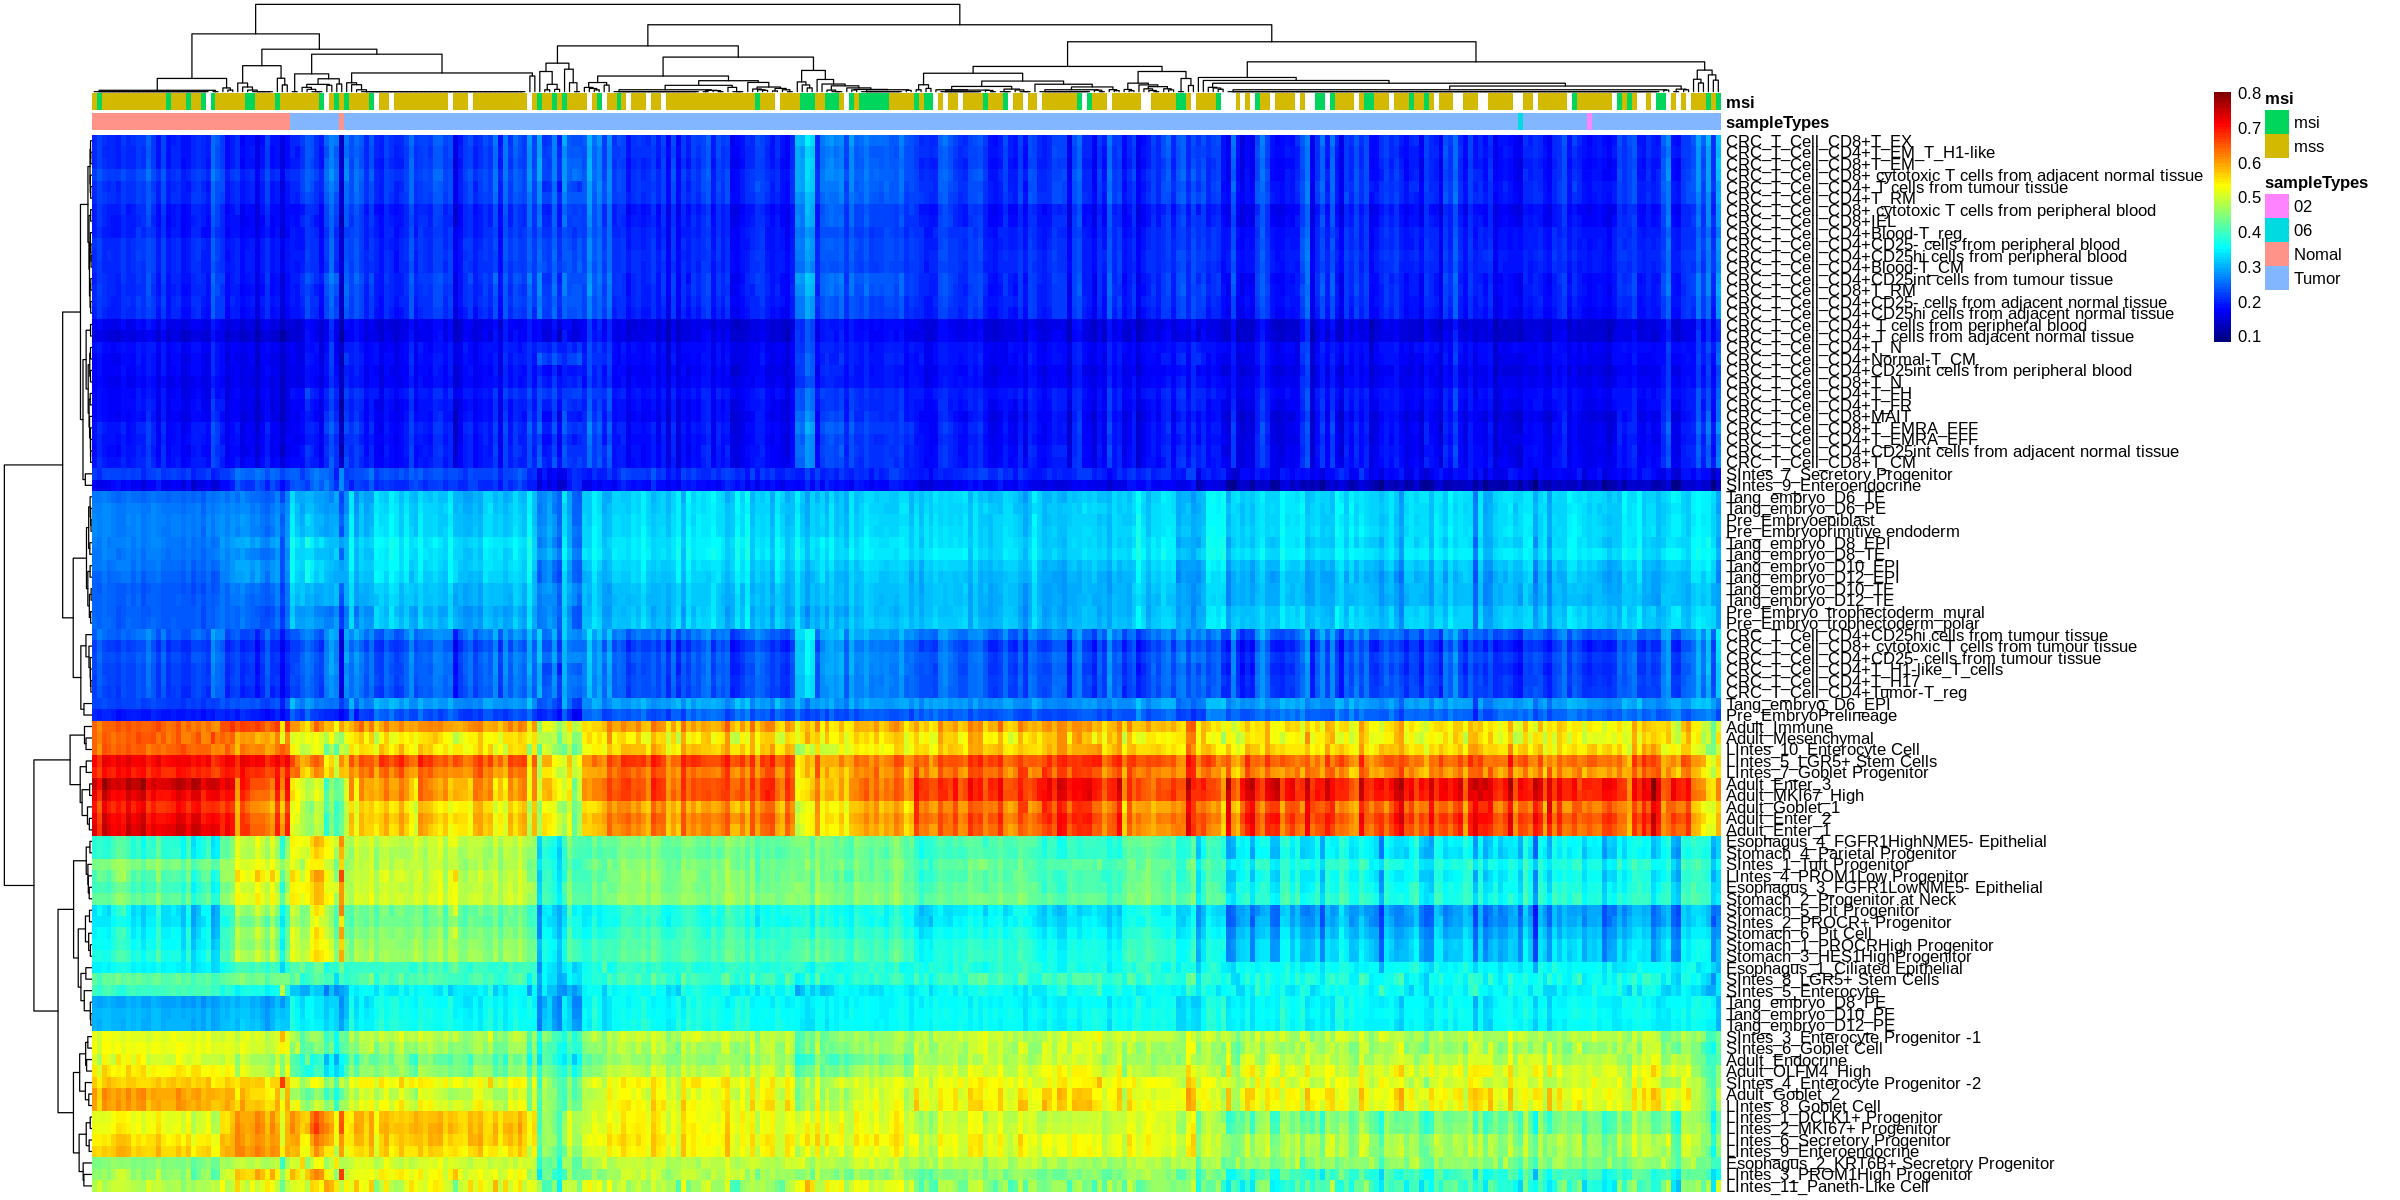

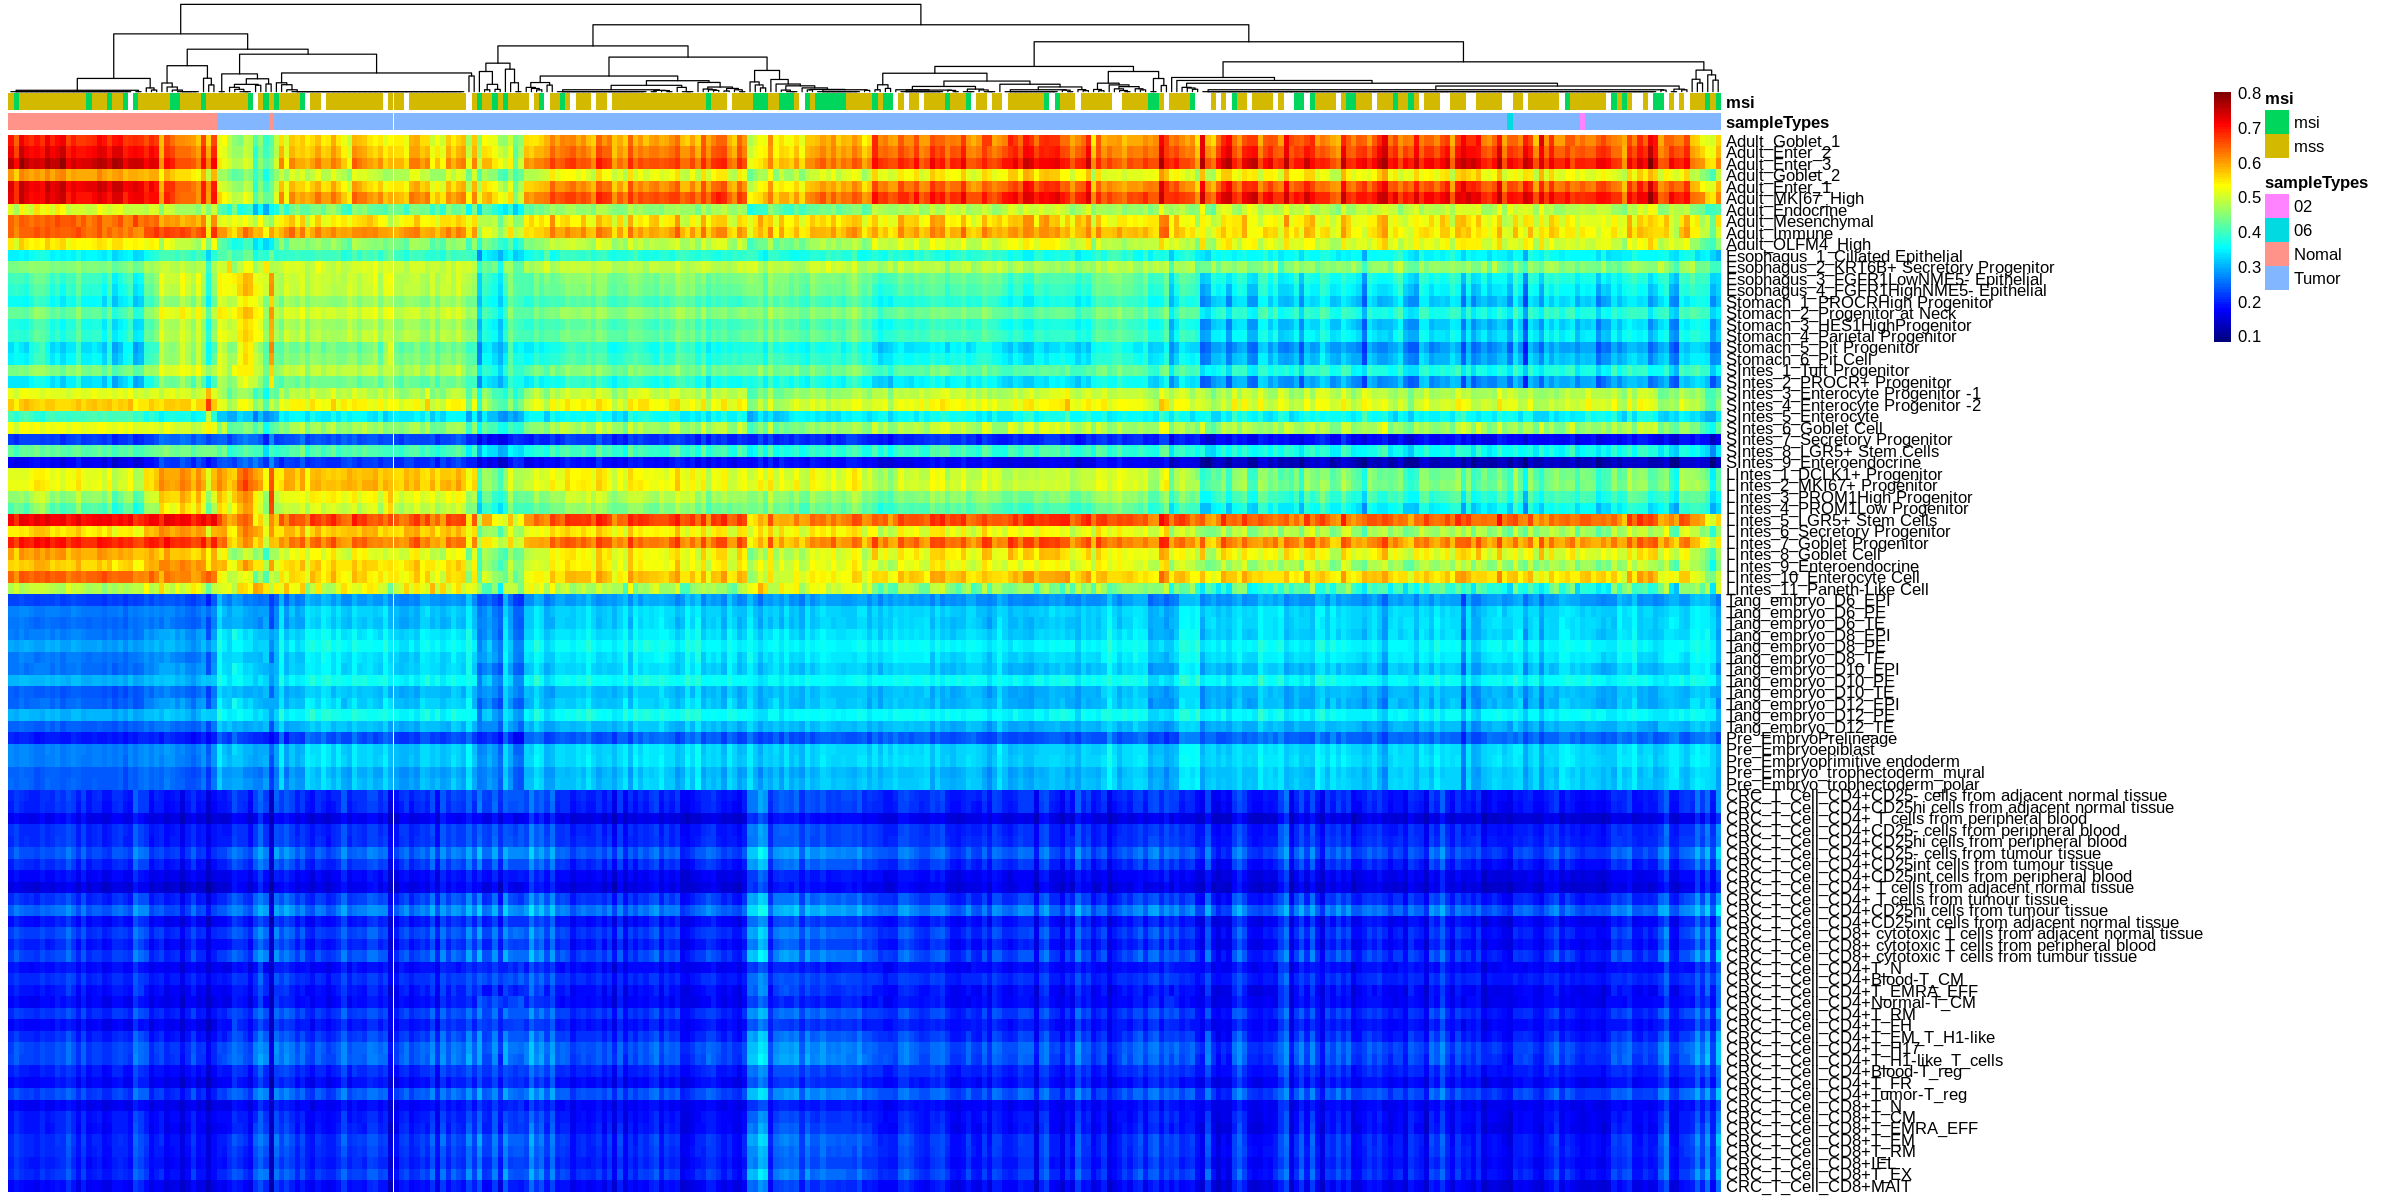

In [28]:
## cv8000 
source("/data8t_4/JH/MyJobs/1_R_script/NormalCancer/JH_SC3_cluster.R")
Cor.tumor <- Cor.Res.CV8000$Cor.merged
Pheno.merged.tumor <- COAD.pheno[,c("sampleTypes","msi")]
### Step3.Cluster cells (In my script the cells with 0 variance was removed)
SC3.Tumor <- JH_SC3_cluster(Cor.tumor,Pheno.merged.tumor,ks=2:4)
## Select a cluster results
hcTumor <- SC3.Tumor$`3`$hc
## Check cluster result
source("/data8t_4/JH/MyJobs/1_R_script/R_Plot/heatmap.JH.R")
options(repr.plot.width=20, repr.plot.height=10)
heatmap.JH(Cor.tumor,show_colnames = F,
           annotation_col = Pheno.merged.tumor, cluster_cols = hcTumor)
heatmap.JH(Cor.tumor,show_colnames = F,cluster_rows = F,
           annotation_col = Pheno.merged.tumor, cluster_cols = hcTumor)

Setting SC3 parameters...
Calculating distances between the cells...
Performing transformations and calculating eigenvectors...
Performing k-means clustering...


Calculating consensus matrix...


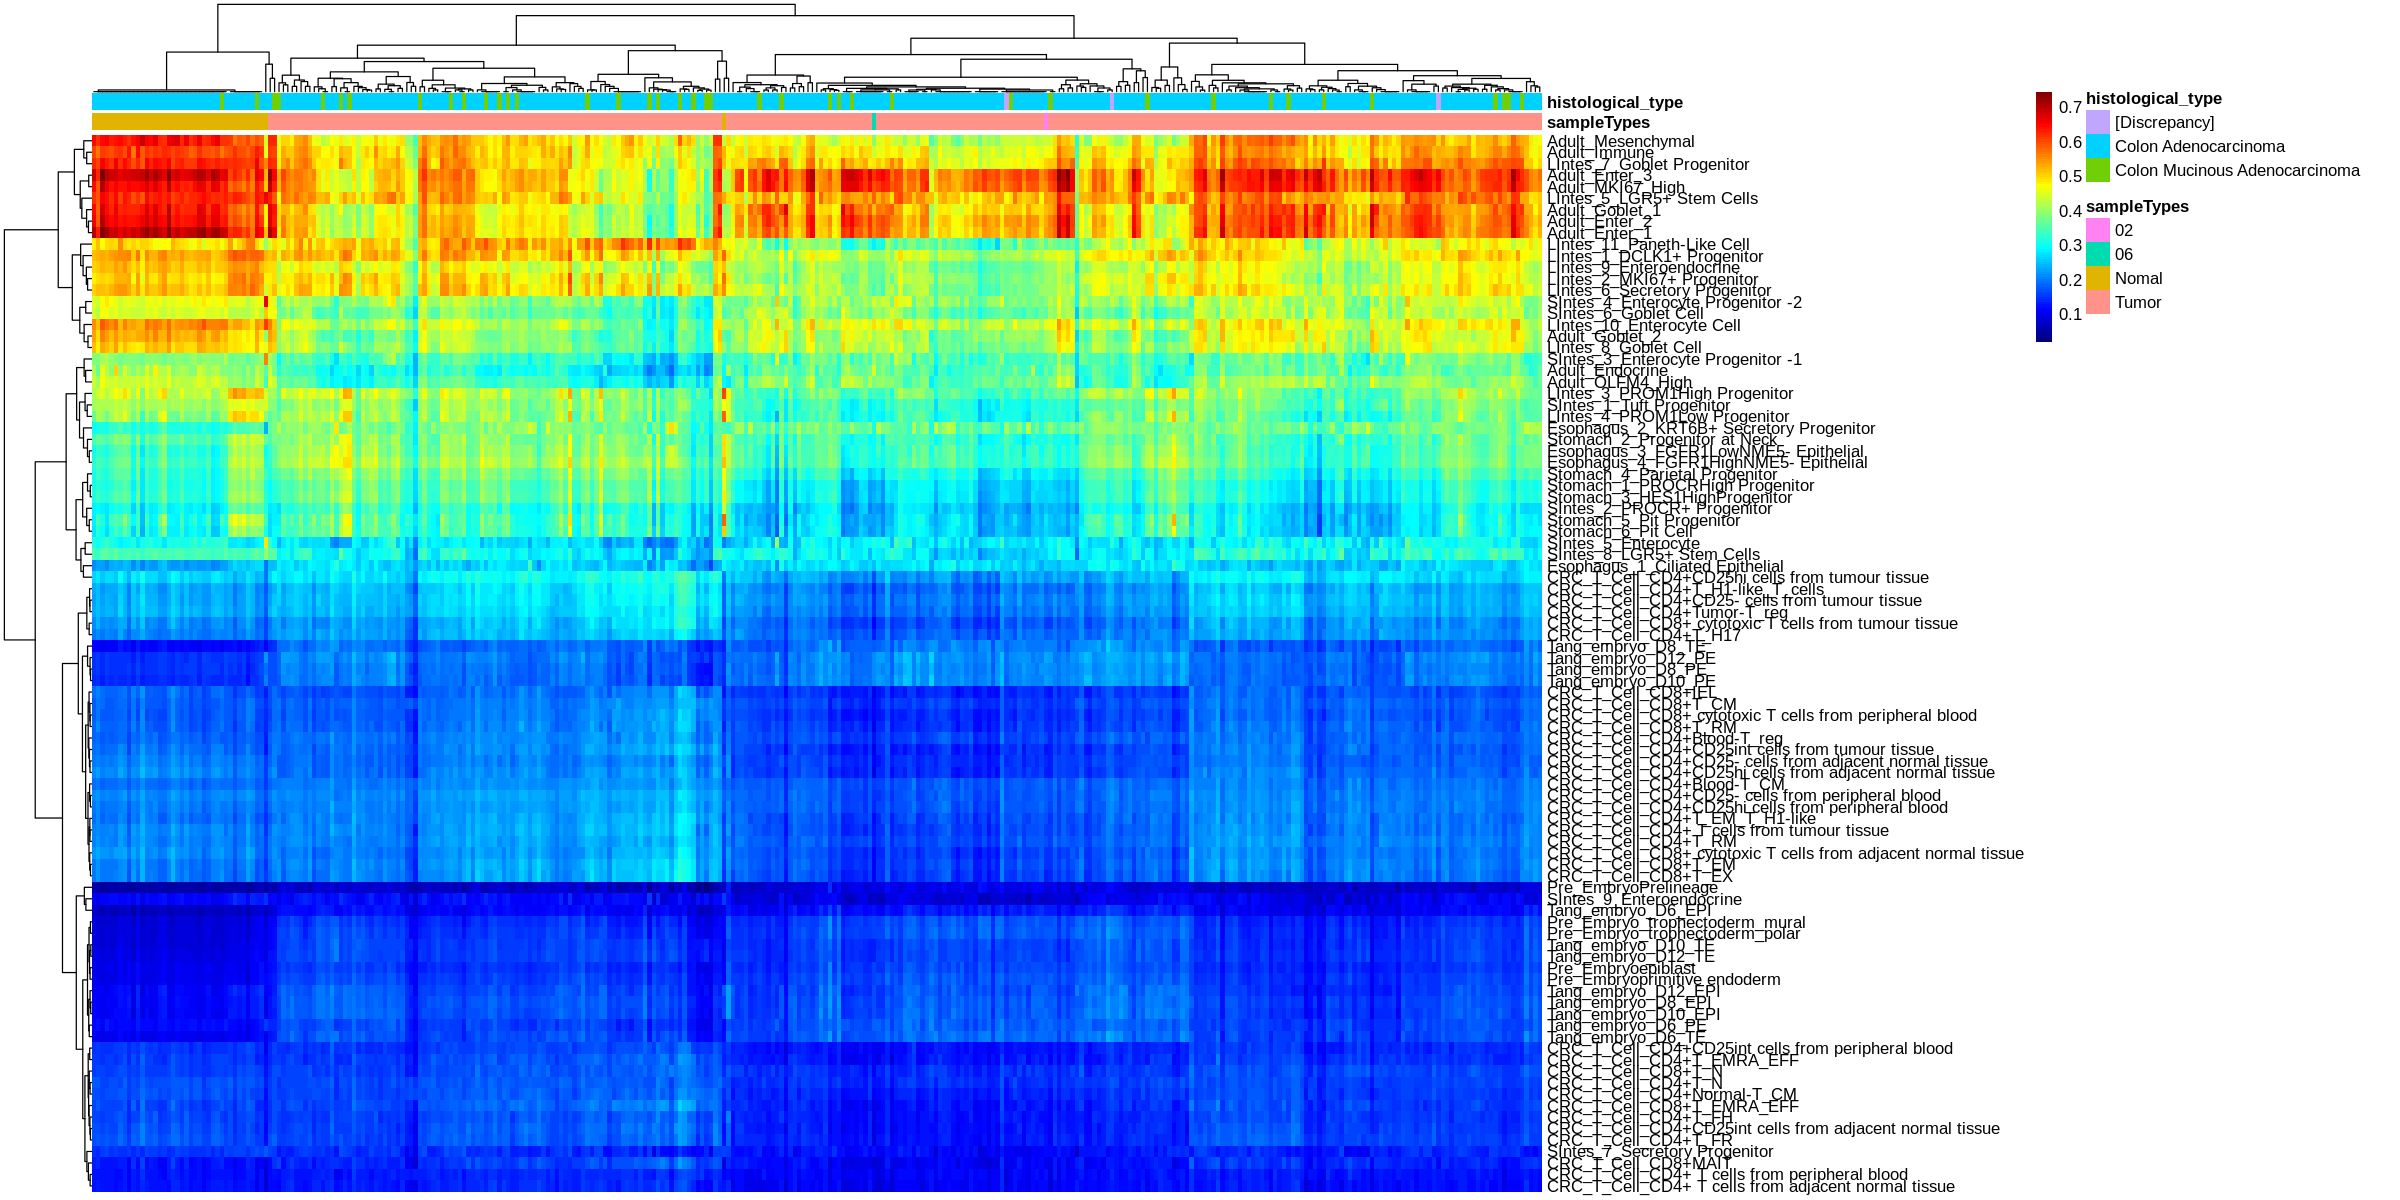

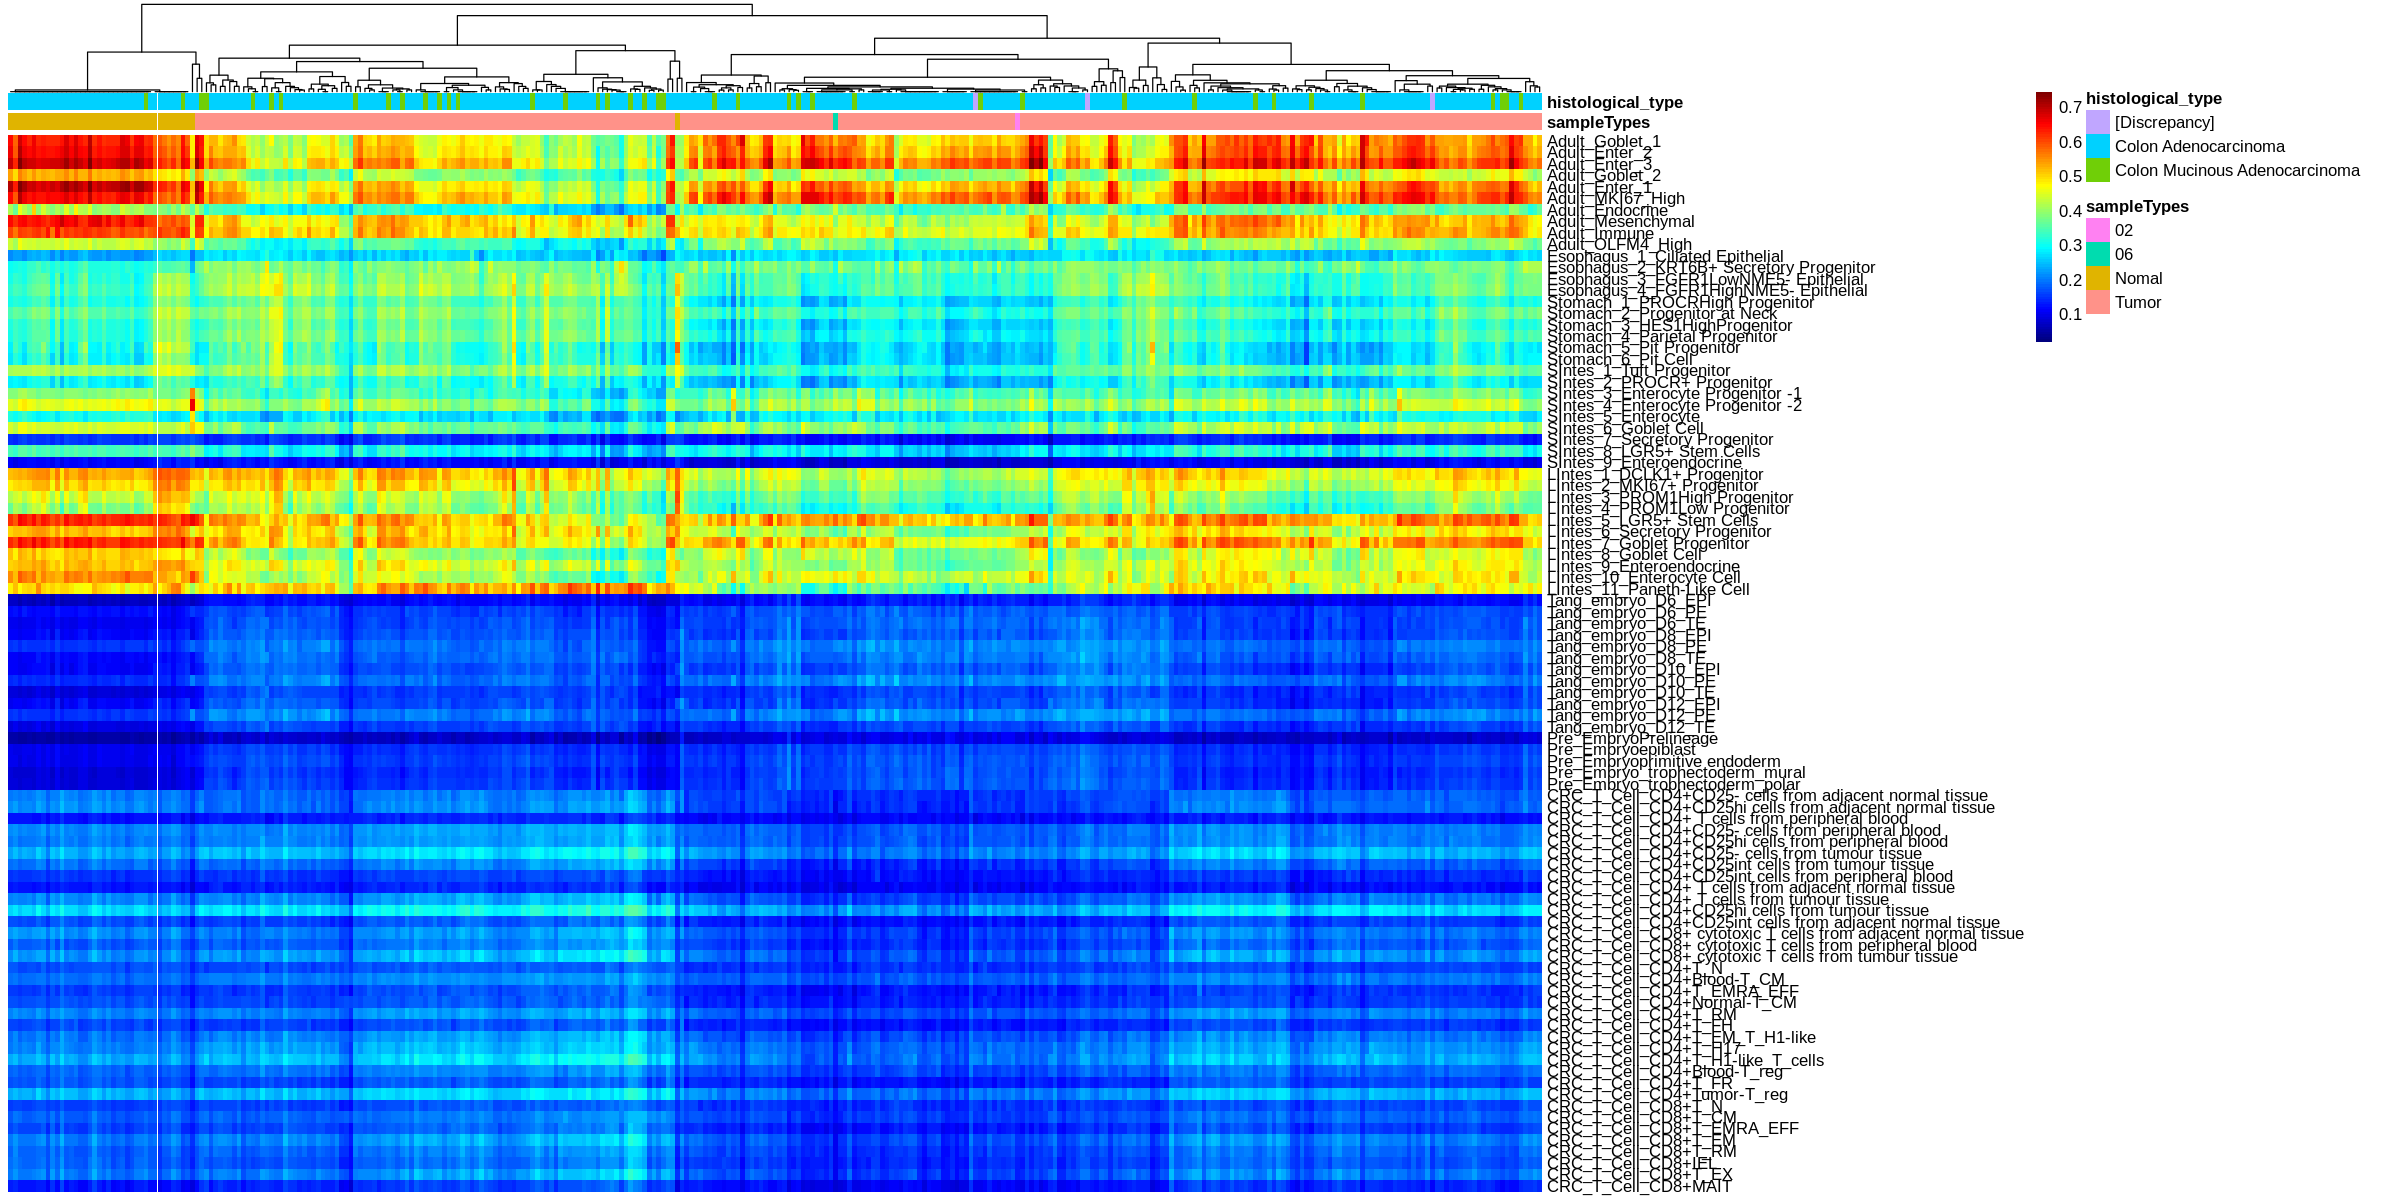

In [29]:
## cv4000 
source("/data8t_4/JH/MyJobs/1_R_script/NormalCancer/JH_SC3_cluster.R")
Cor.tumor <- Cor.Res.CV4000$Cor.merged
Pheno.merged.tumor <- COAD.pheno[,c("sampleTypes","histological_type")]
### Step3.Cluster cells (In my script the cells with 0 variance was removed)
SC3.Tumor <- JH_SC3_cluster(Cor.tumor,Pheno.merged.tumor,ks=2:4)
## Select a cluster results
hcTumor <- SC3.Tumor$`3`$hc
## Check cluster result
source("/data8t_4/JH/MyJobs/1_R_script/R_Plot/heatmap.JH.R")
options(repr.plot.width=20, repr.plot.height=10)
heatmap.JH(Cor.tumor,show_colnames = F,
           annotation_col = Pheno.merged.tumor, cluster_cols = hcTumor)
hcTumor.4000 <- hcTumor
heatmap.JH(Cor.tumor,show_colnames = F,cluster_rows = F,
           annotation_col = Pheno.merged.tumor, cluster_cols = hcTumor.4000)

Setting SC3 parameters...
Calculating distances between the cells...
Performing transformations and calculating eigenvectors...
Performing k-means clustering...


Calculating consensus matrix...


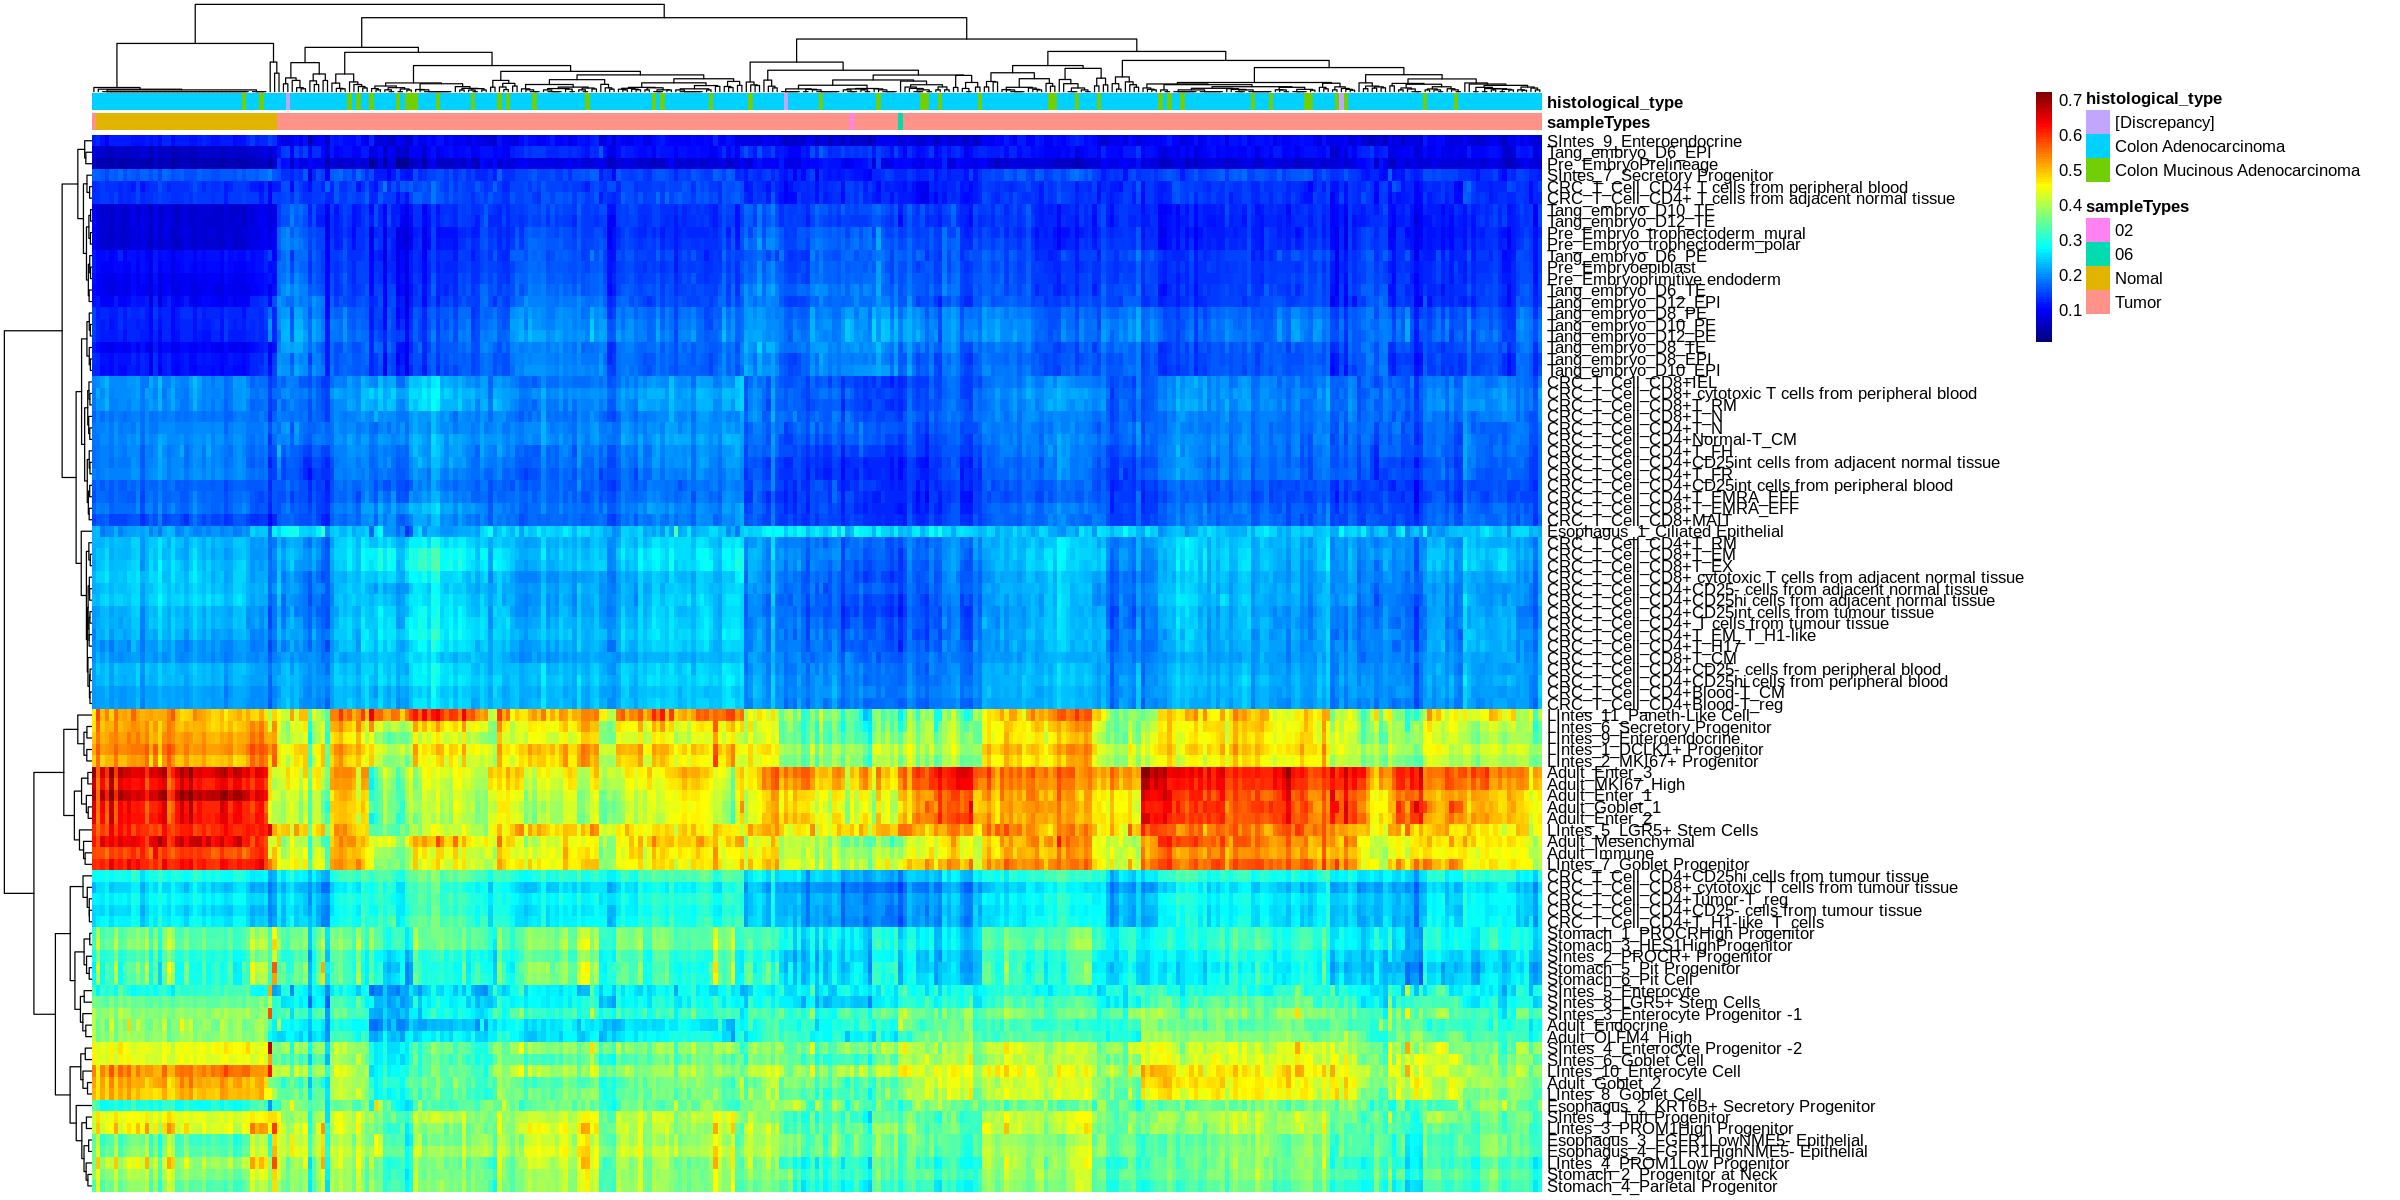

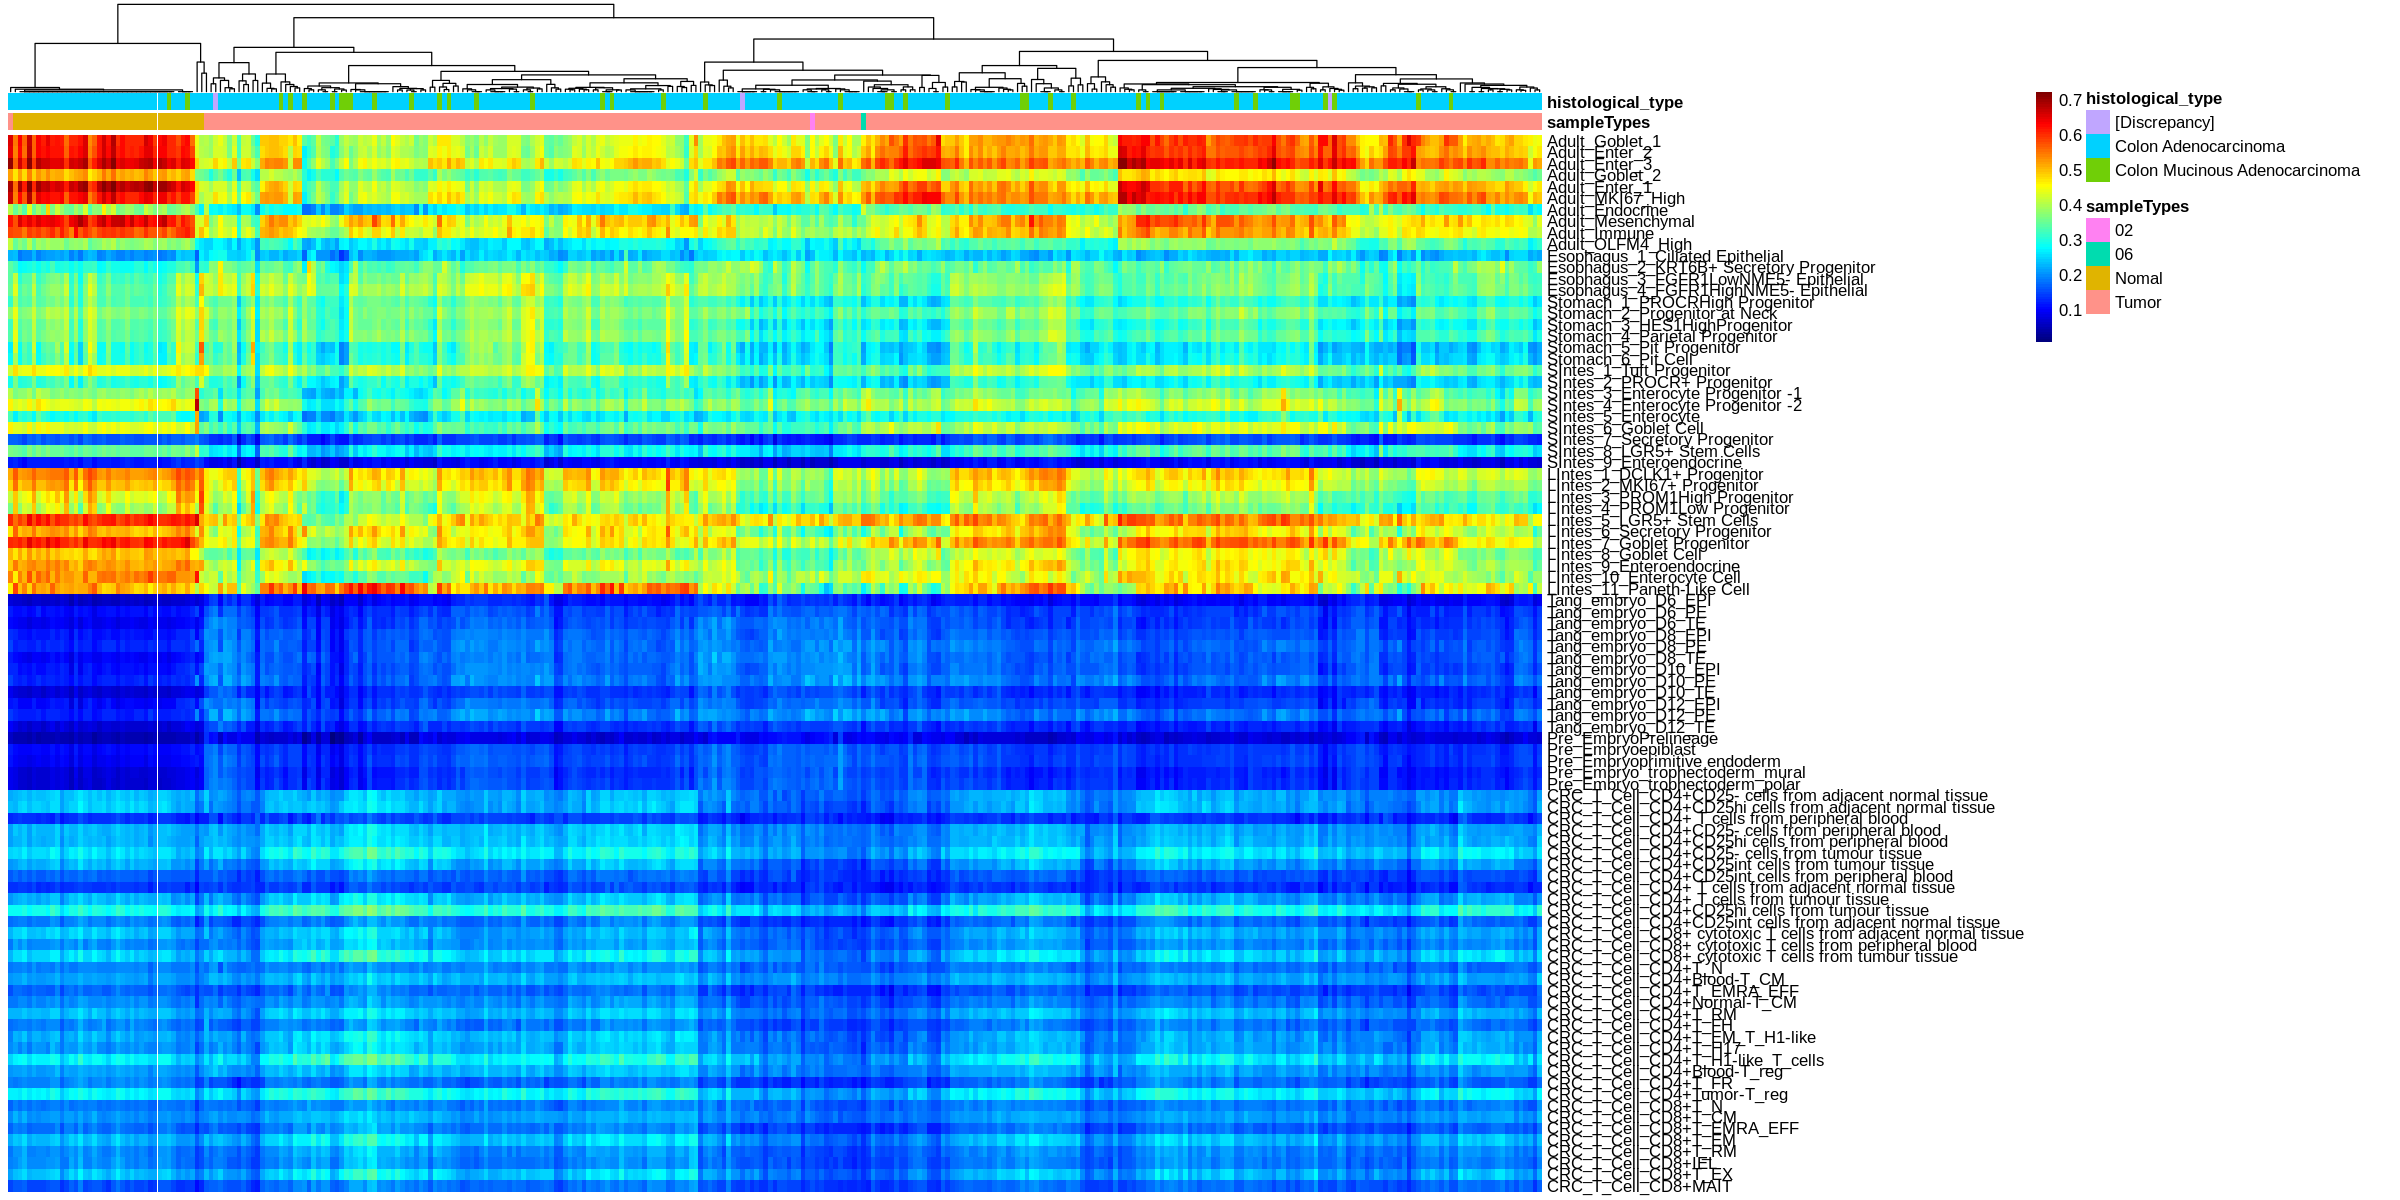

In [30]:
## cv3000 
source("/data8t_4/JH/MyJobs/1_R_script/NormalCancer/JH_SC3_cluster.R")
Cor.tumor <- Cor.Res.CV3000$Cor.merged
Pheno.merged.tumor <- COAD.pheno[,c("sampleTypes","histological_type")]
### Step3.Cluster cells (In my script the cells with 0 variance was removed)
SC3.Tumor <- JH_SC3_cluster(Cor.tumor,Pheno.merged.tumor,ks=2:4)
## Select a cluster results
hcTumor <- SC3.Tumor$`3`$hc
## Check cluster result
source("/data8t_4/JH/MyJobs/1_R_script/R_Plot/heatmap.JH.R")
options(repr.plot.width=20, repr.plot.height=10)
heatmap.JH(Cor.tumor,show_colnames = F,
           annotation_col = Pheno.merged.tumor, cluster_cols = hcTumor)
hcTumor.2000 <- hcTumor
heatmap.JH(Cor.tumor,show_colnames = F,cluster_rows = F,
           annotation_col = Pheno.merged.tumor, cluster_cols = hcTumor.2000)

Setting SC3 parameters...
Calculating distances between the cells...
Performing transformations and calculating eigenvectors...
Performing k-means clustering...


Calculating consensus matrix...


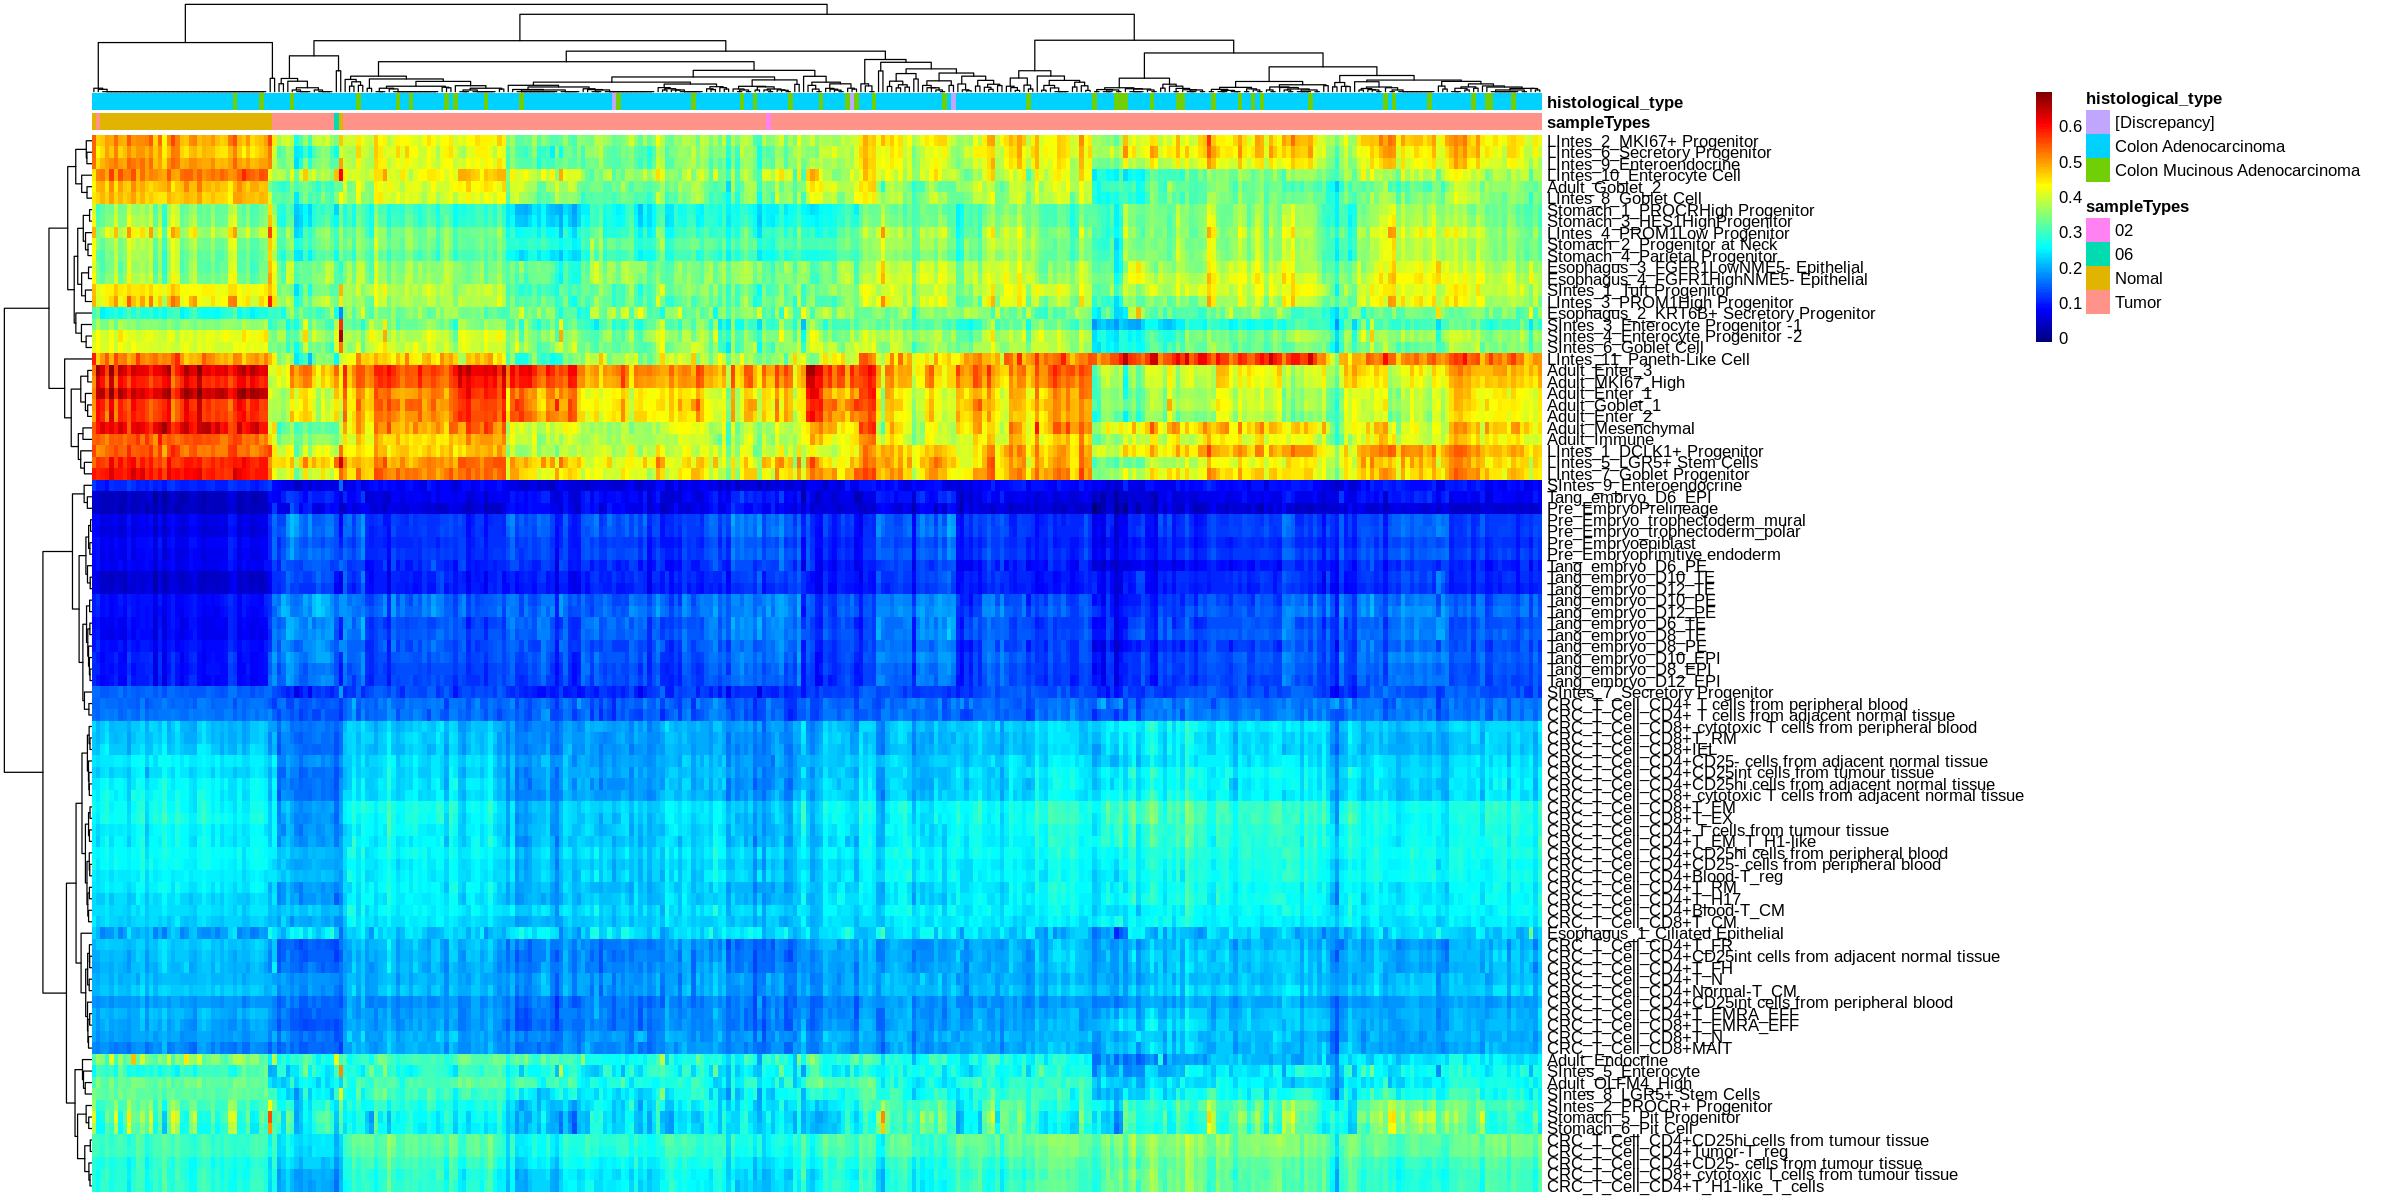

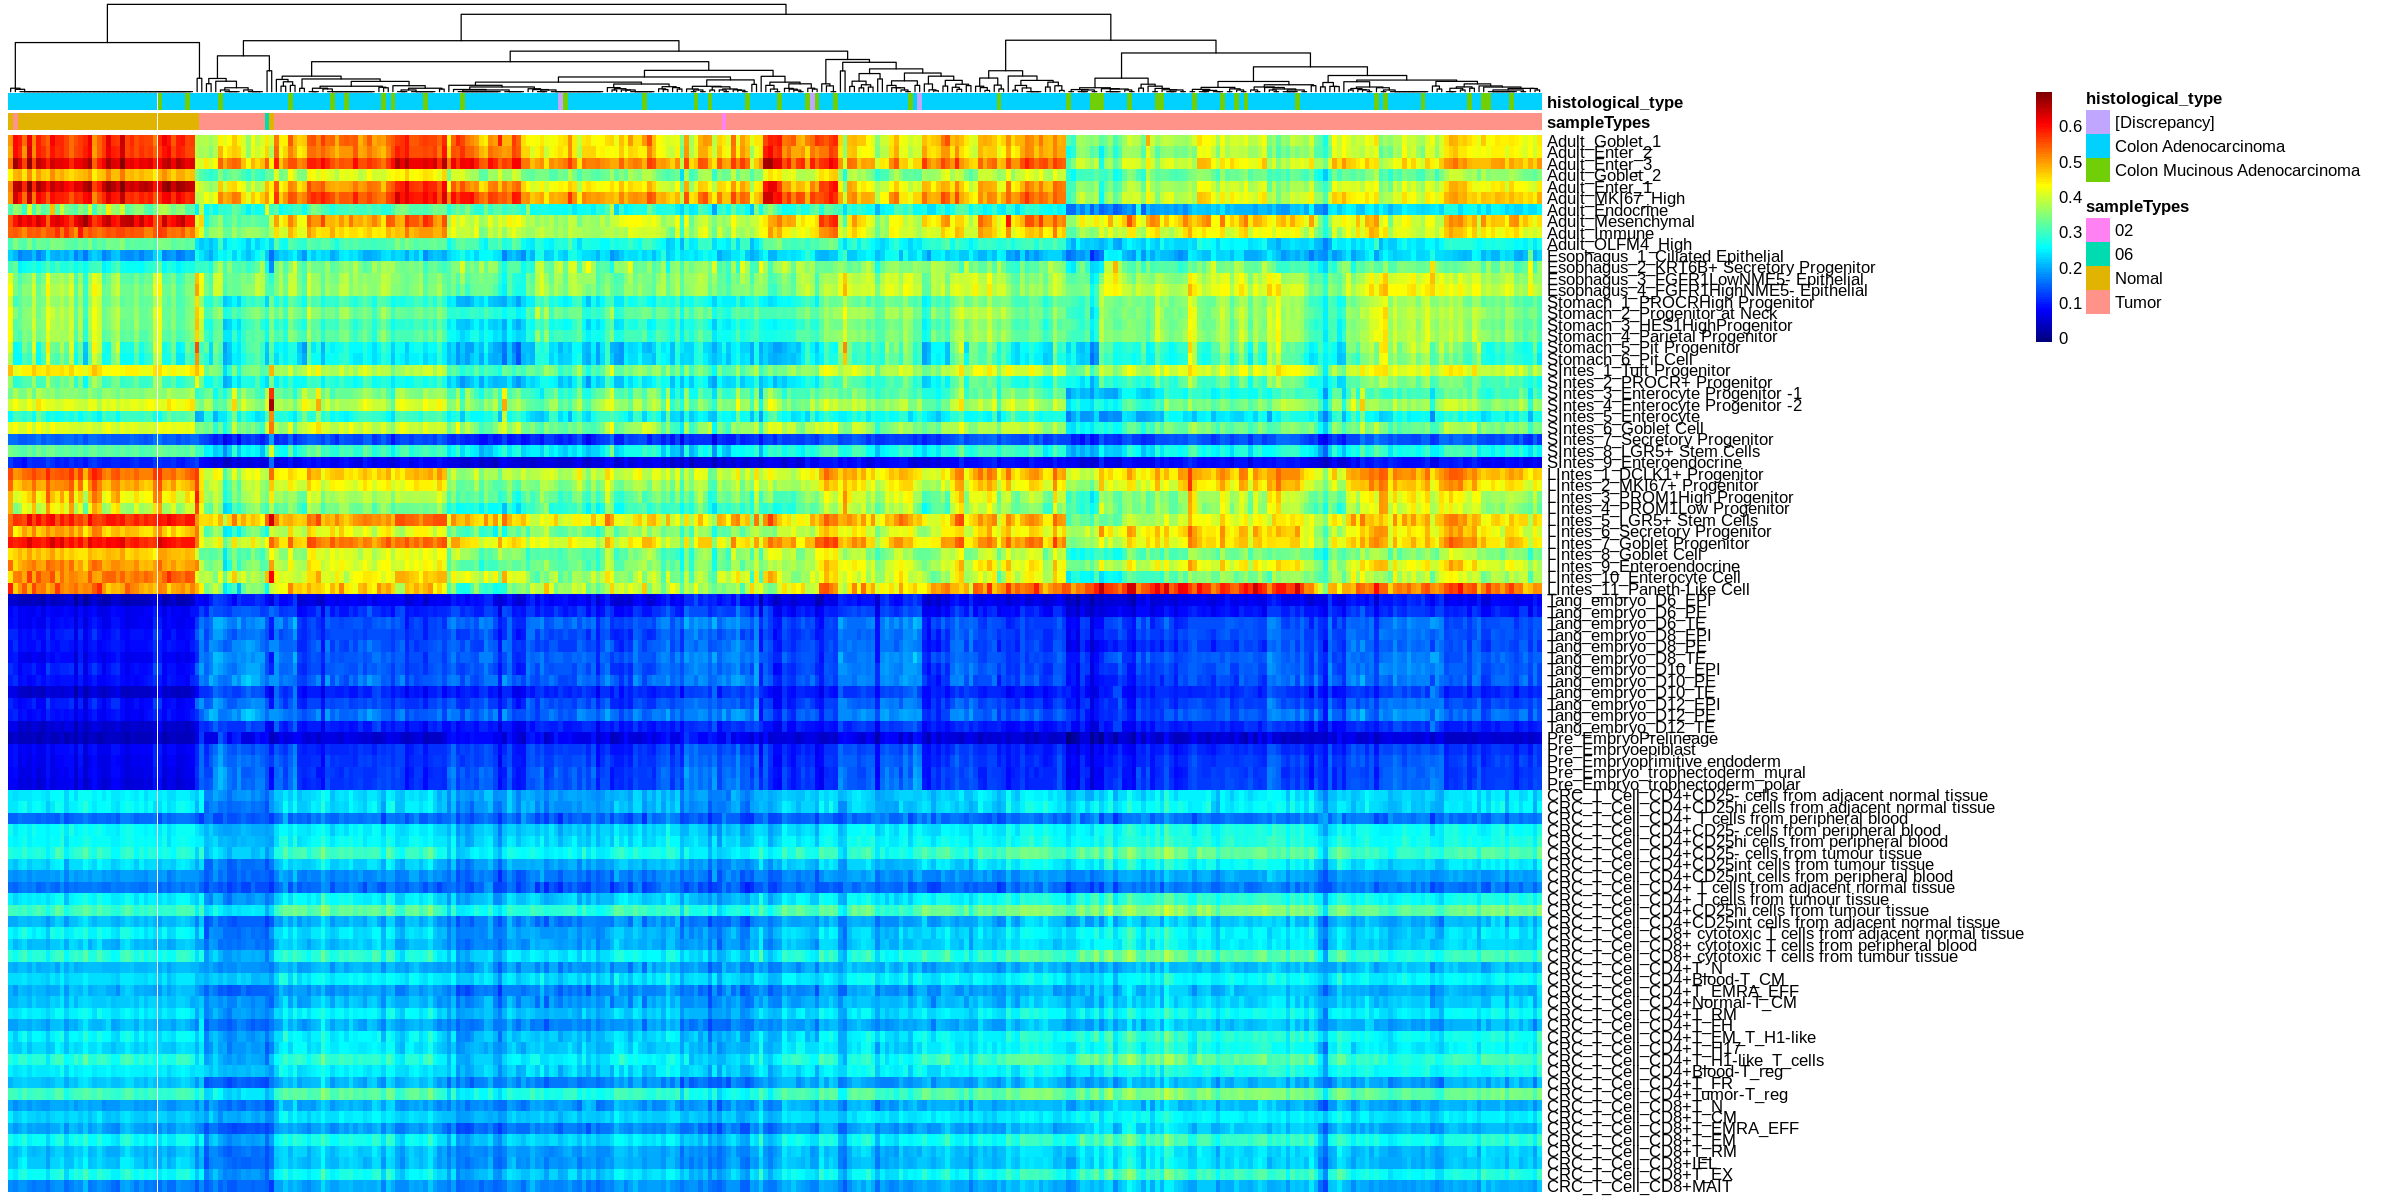

In [31]:
## cv2500 
source("/data8t_4/JH/MyJobs/1_R_script/NormalCancer/JH_SC3_cluster.R")
Cor.tumor <- Cor.Res.CV2500$Cor.merged
Pheno.merged.tumor <- COAD.pheno[,c("sampleTypes","histological_type")]
### Step3.Cluster cells (In my script the cells with 0 variance was removed)
SC3.Tumor <- JH_SC3_cluster(Cor.tumor,Pheno.merged.tumor,ks=2:4)
## Select a cluster results
hcTumor <- SC3.Tumor$`3`$hc
## Check cluster result
source("/data8t_4/JH/MyJobs/1_R_script/R_Plot/heatmap.JH.R")
options(repr.plot.width=20, repr.plot.height=10)
heatmap.JH(Cor.tumor,show_colnames = F,
           annotation_col = Pheno.merged.tumor, cluster_cols = hcTumor)
hcTumor.2000 <- hcTumor
heatmap.JH(Cor.tumor,show_colnames = F,cluster_rows = F,
           annotation_col = Pheno.merged.tumor, cluster_cols = hcTumor.2000)

Setting SC3 parameters...
Calculating distances between the cells...
Performing transformations and calculating eigenvectors...
Performing k-means clustering...


Calculating consensus matrix...


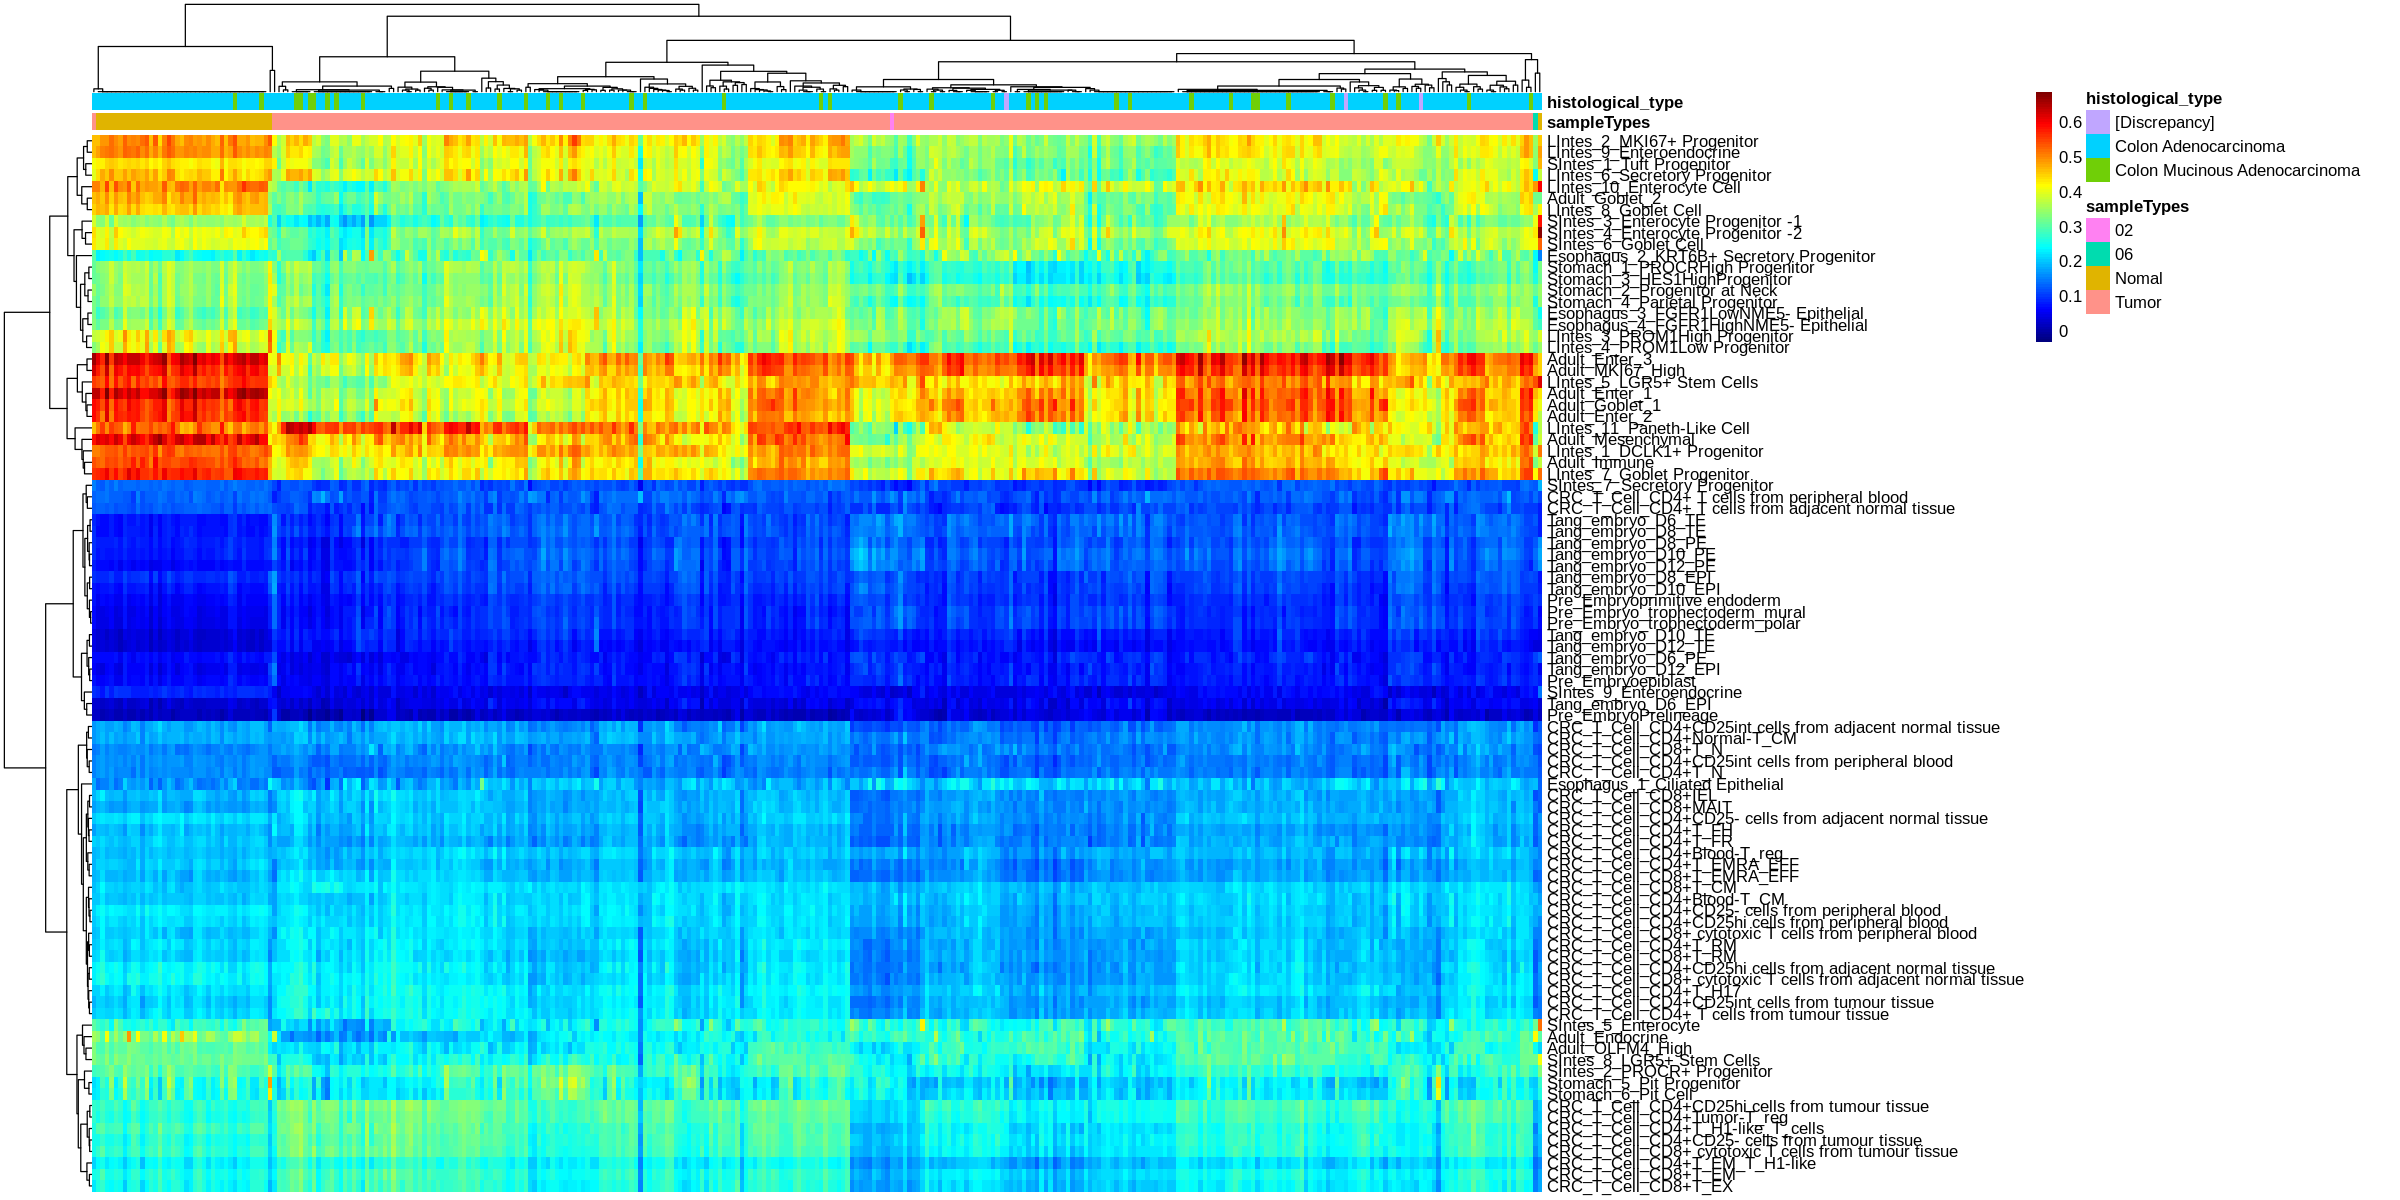

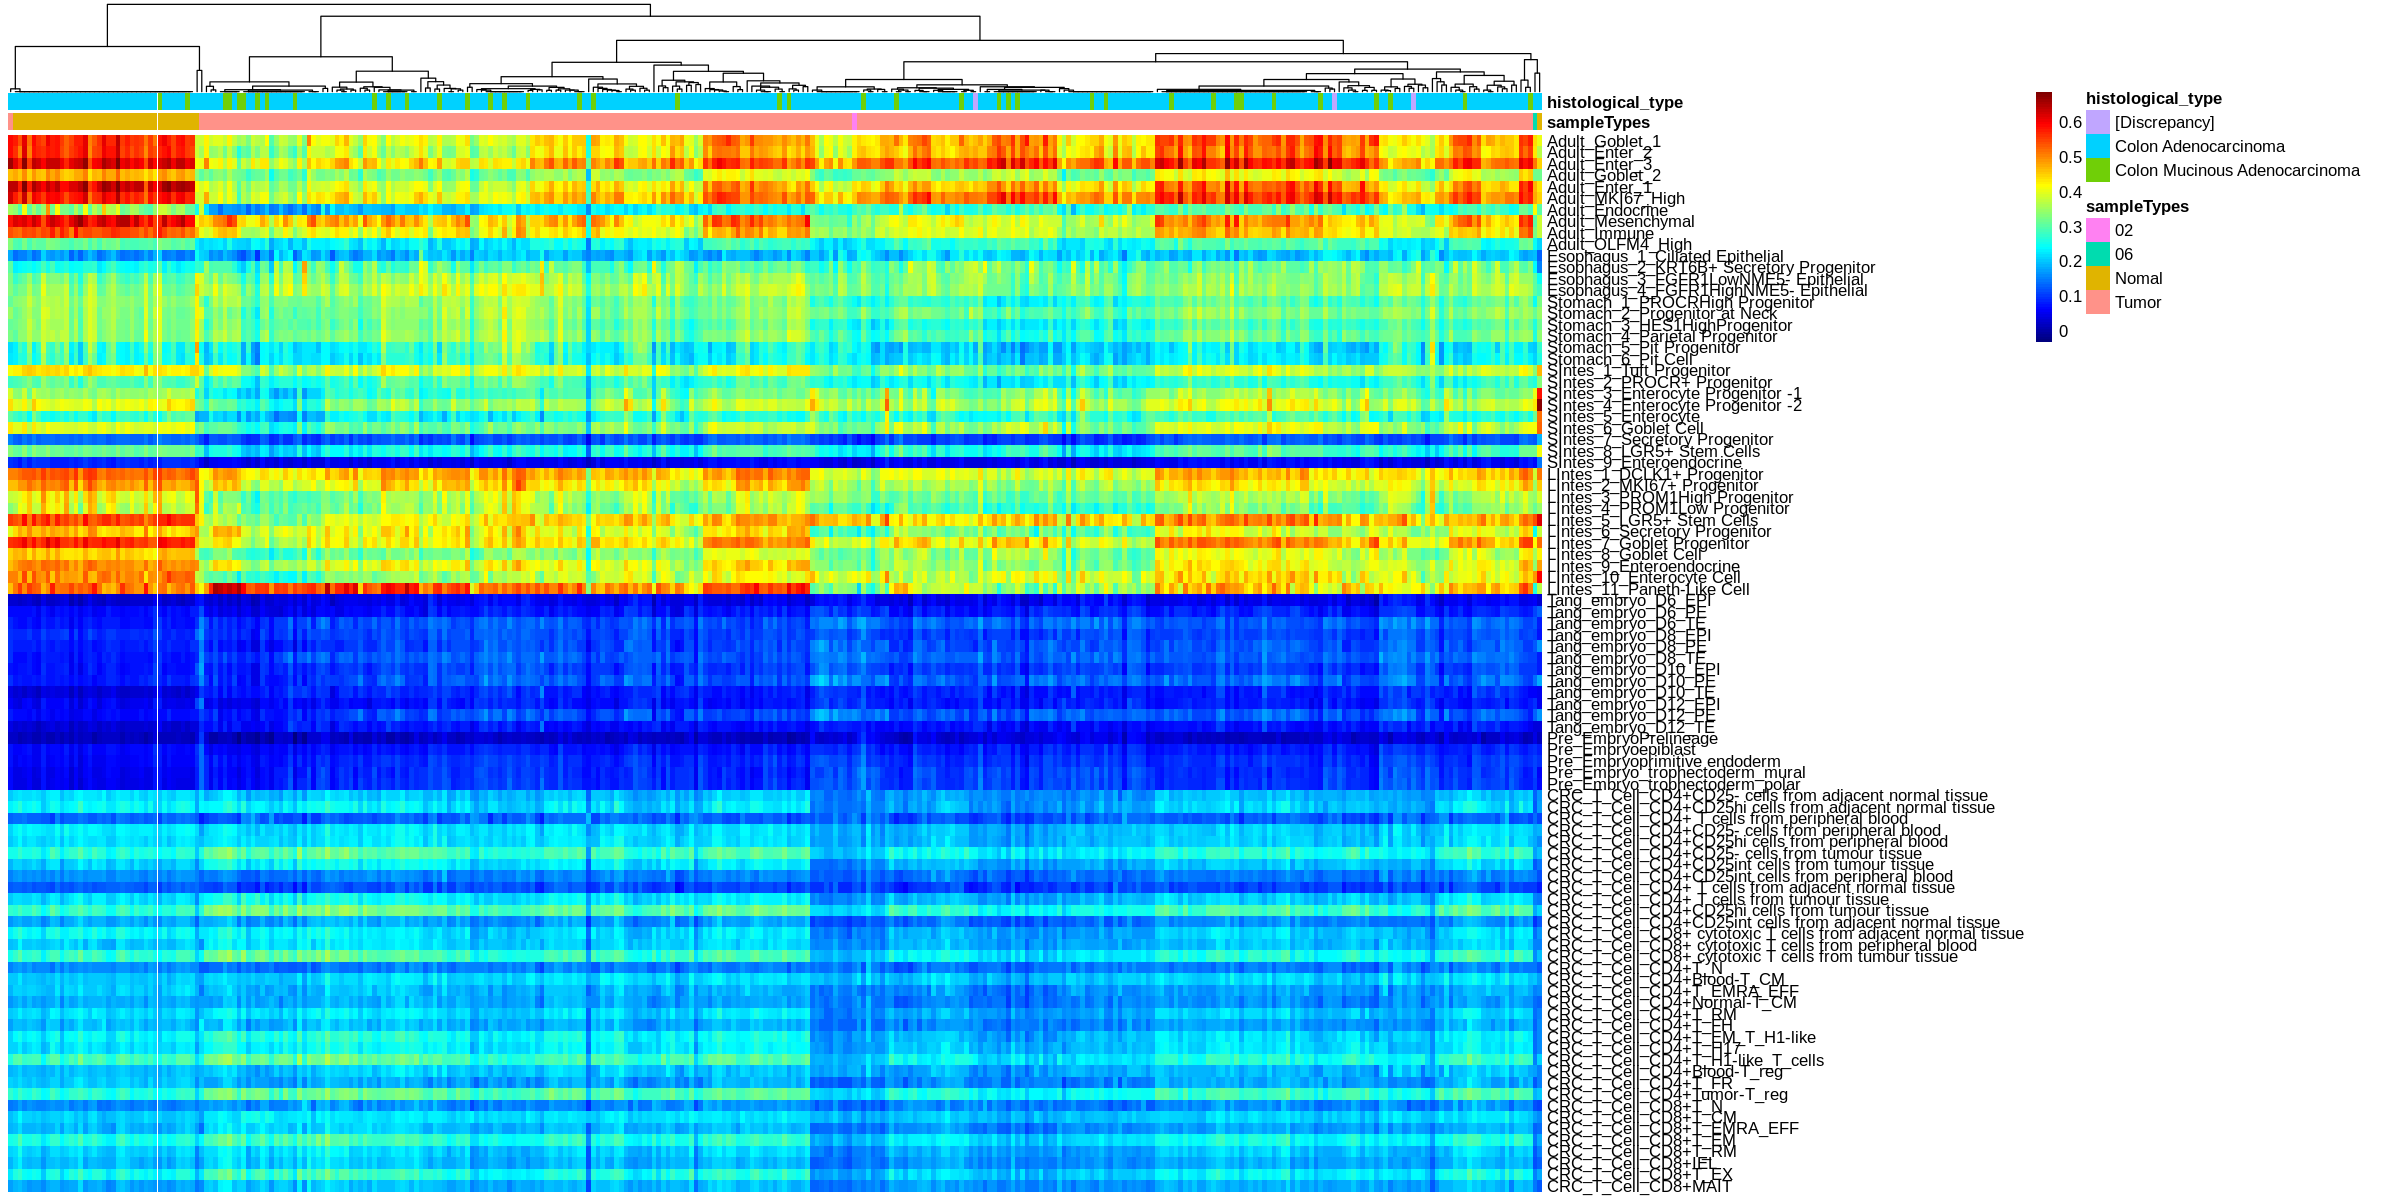

In [32]:
## cv2000 
source("/data8t_4/JH/MyJobs/1_R_script/NormalCancer/JH_SC3_cluster.R")
Cor.tumor <- Cor.Res.CV2000$Cor.merged
Pheno.merged.tumor <- COAD.pheno[,c("sampleTypes","histological_type")]
### Step3.Cluster cells (In my script the cells with 0 variance was removed)
SC3.Tumor <- JH_SC3_cluster(Cor.tumor,Pheno.merged.tumor,ks=2:4)
## Select a cluster results
hcTumor <- SC3.Tumor$`3`$hc
## Check cluster result
source("/data8t_4/JH/MyJobs/1_R_script/R_Plot/heatmap.JH.R")
options(repr.plot.width=20, repr.plot.height=10)
heatmap.JH(Cor.tumor,show_colnames = F,
           annotation_col = Pheno.merged.tumor, cluster_cols = hcTumor)
hcTumor.2000 <- hcTumor
heatmap.JH(Cor.tumor,show_colnames = F,cluster_rows = F,
           annotation_col = Pheno.merged.tumor, cluster_cols = hcTumor.2000)

Setting SC3 parameters...
Calculating distances between the cells...
Performing transformations and calculating eigenvectors...
Performing k-means clustering...


Calculating consensus matrix...


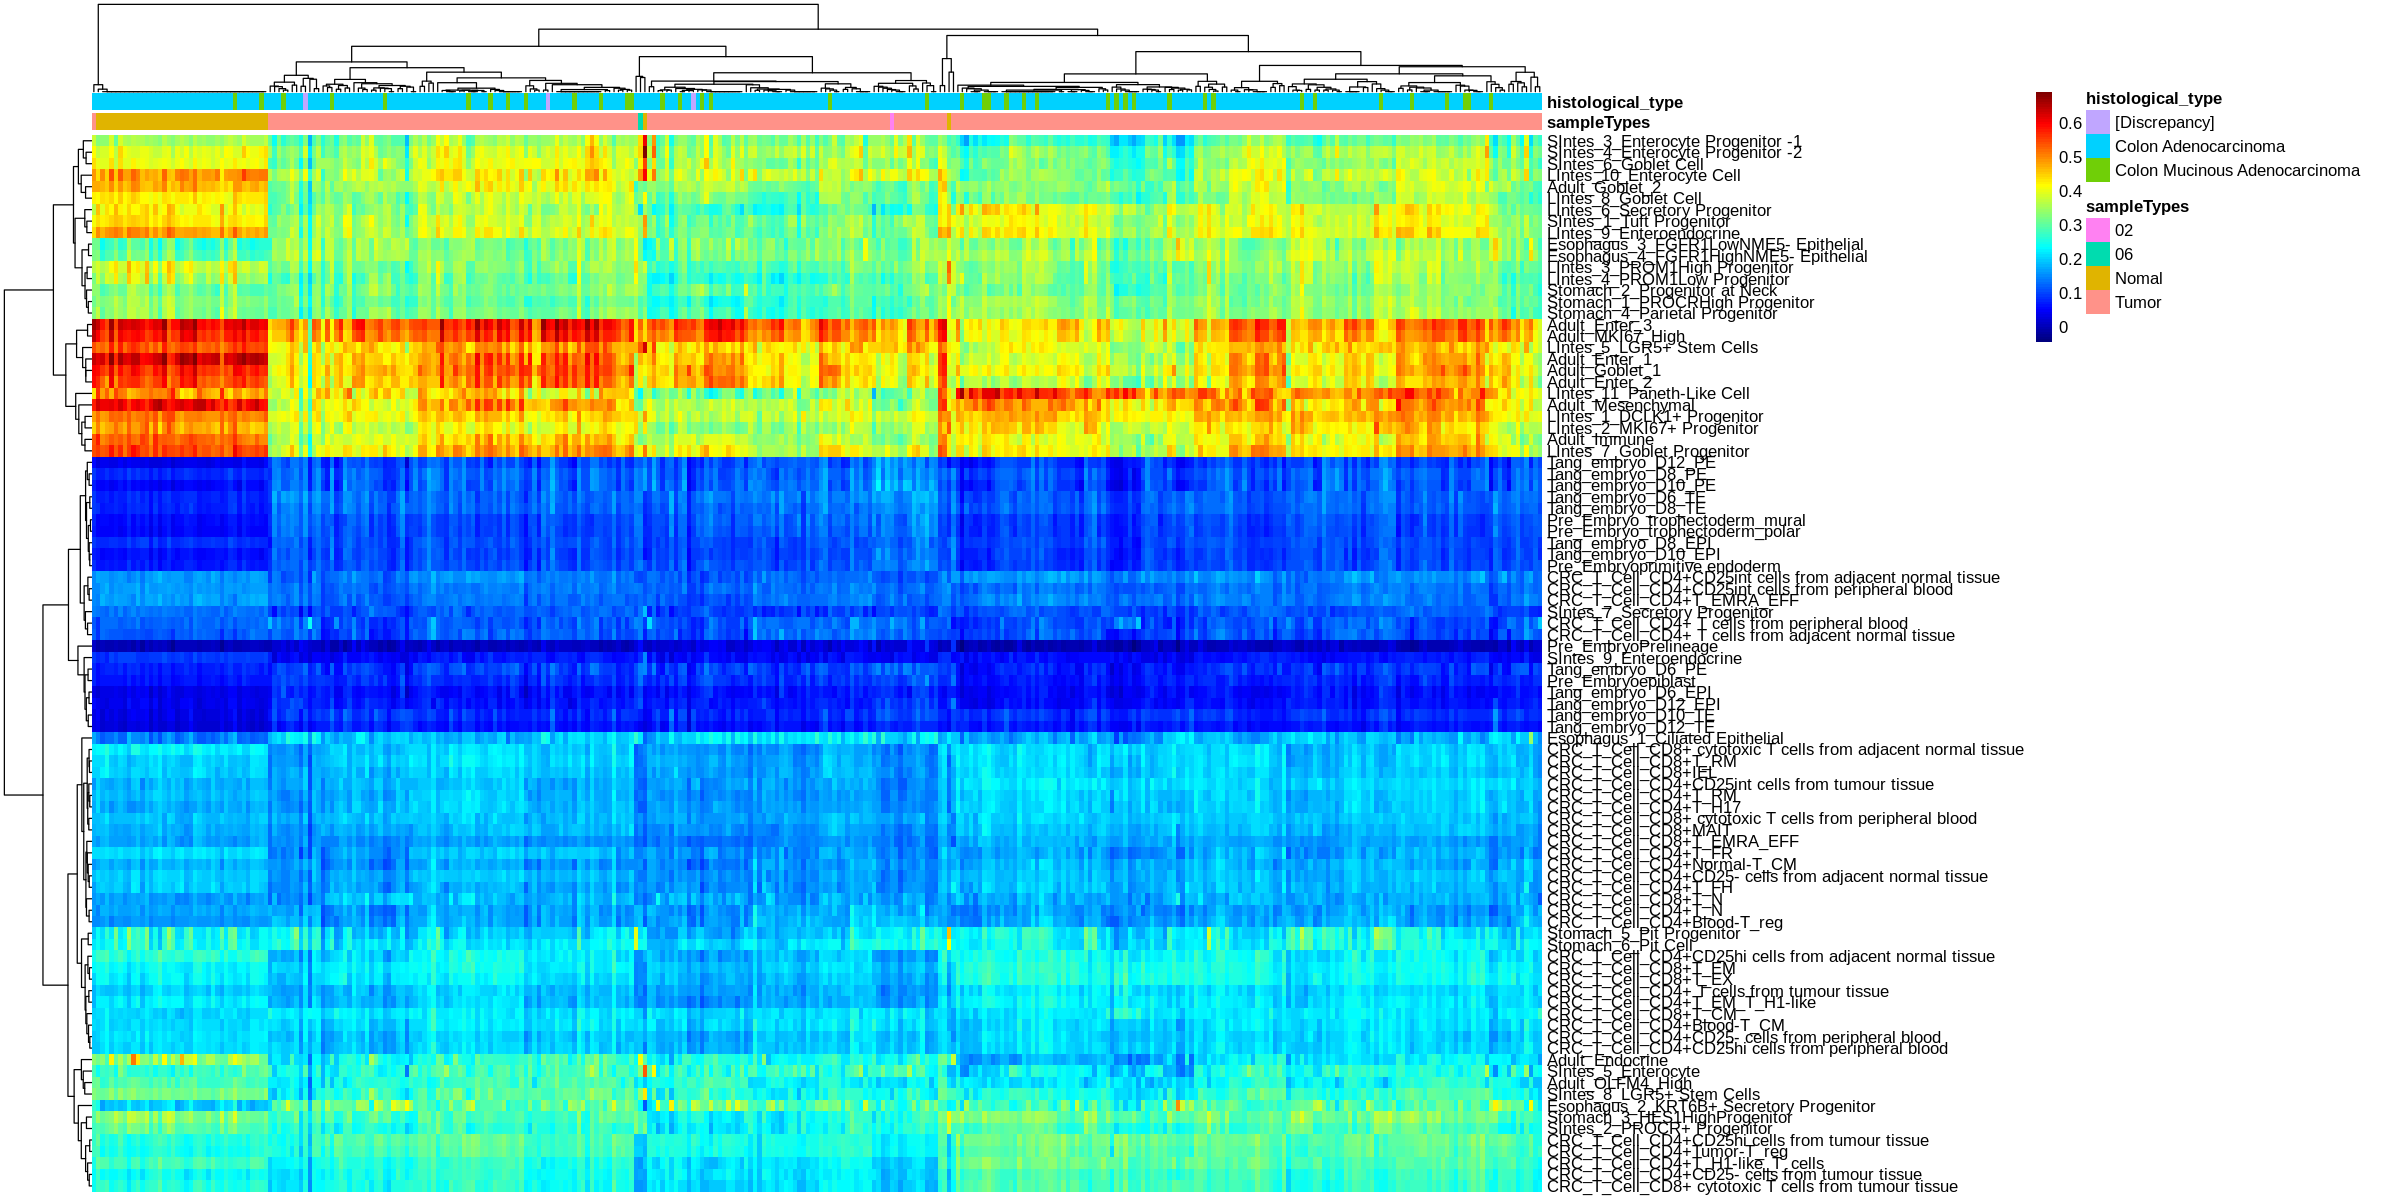

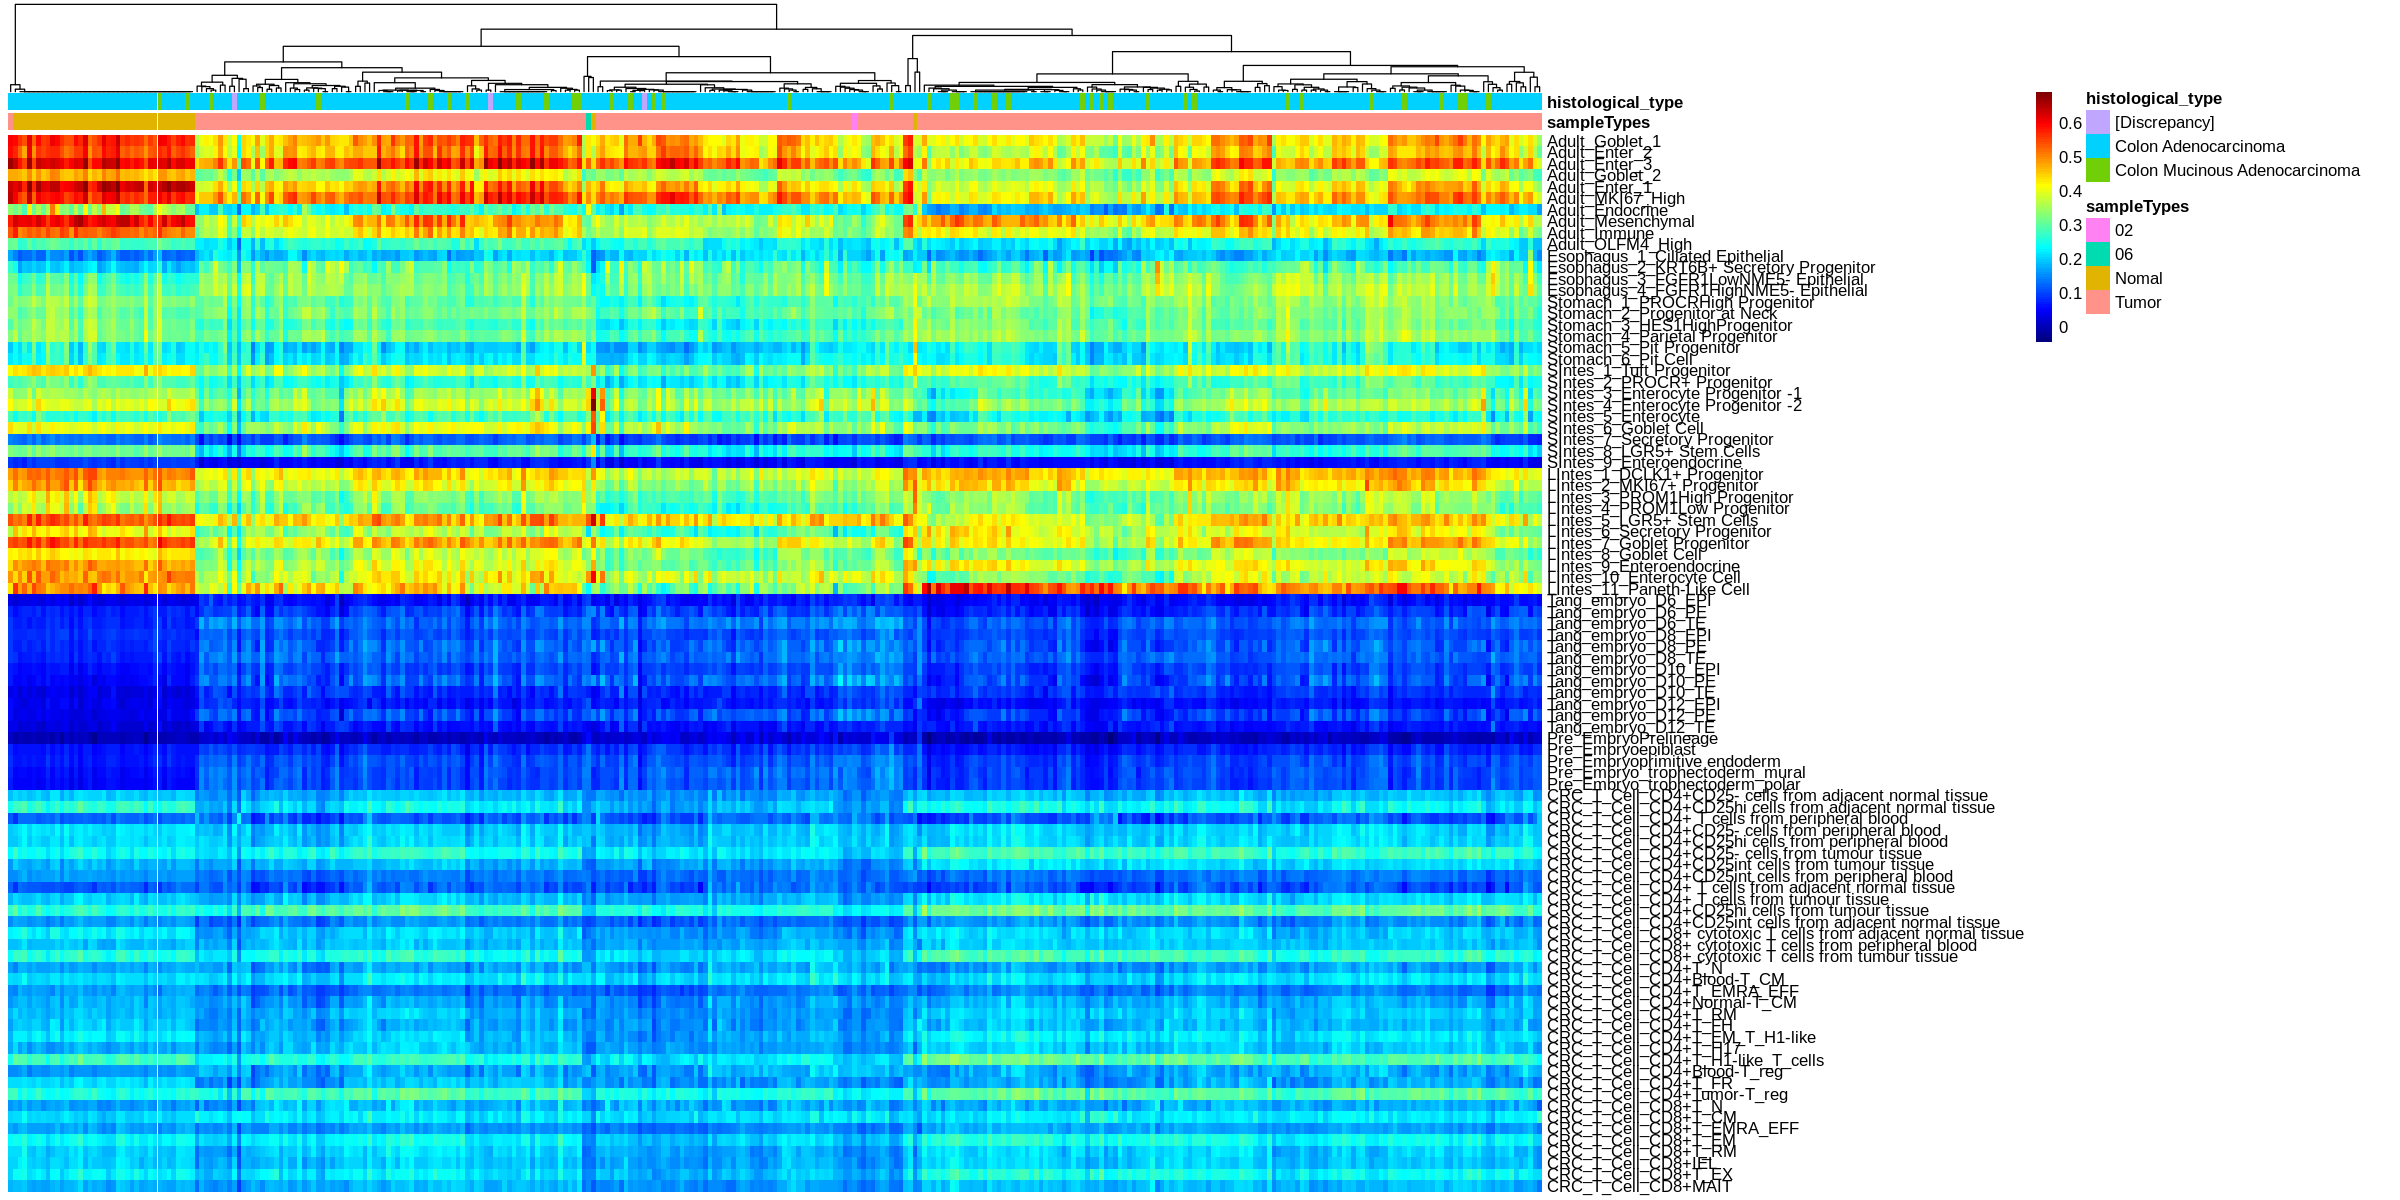

In [33]:
# cv1500 
source("/data8t_4/JH/MyJobs/1_R_script/NormalCancer/JH_SC3_cluster.R")
Cor.tumor <- Cor.Res.CV1500$Cor.merged
Pheno.merged.tumor <- COAD.pheno[,c("sampleTypes","histological_type")]
### Step3.Cluster cells (In my script the cells with 0 variance was removed)
SC3.Tumor <- JH_SC3_cluster(Cor.tumor,Pheno.merged.tumor,ks=2:4)
## Select a cluster results
hcTumor <- SC3.Tumor$`3`$hc
## Check cluster result
source("/data8t_4/JH/MyJobs/1_R_script/R_Plot/heatmap.JH.R")
options(repr.plot.width=20, repr.plot.height=10)
heatmap.JH(Cor.tumor,show_colnames = F,
           annotation_col = Pheno.merged.tumor, cluster_cols = hcTumor)
hcTumor.1500 <- hcTumor
heatmap.JH(Cor.tumor,show_colnames = F,cluster_rows = F,
           annotation_col = Pheno.merged.tumor, cluster_cols = hcTumor.1500)